In [1]:
#Importamos librerías
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

# Plotting Histogram of iris data

A continuación vamos a proceder a realizar un histograma sobre la información de la longitud de petalo de la flor versicolor, esta información ha sido extraida del conjunto de datos Iris. Aunque no sea necesario, es una buena práctica asignarle la variable dummy _, a las operaciones plt.hist, plt.xlabel o plt.ylabel.

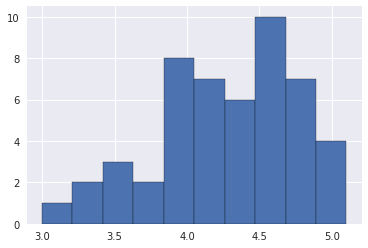

In [2]:
#Nos creamos el array con el cual vamos a trabajar
versicolor_petal_length = np.array([ 4.7,  4.5,  4.9,  4. ,  4.6,  4.5,  4.7,  3.3,  4.6,  3.9,  3.5,
                                    4.2,  4. ,  4.7,  3.6,  4.4,  4.5,  4.1,  4.5,  3.9,  4.8,  4. ,
                                    4.9,  4.7,  4.3,  4.4,  4.8,  5. ,  4.5,  3.5,  3.8,  3.7,  3.9,
                                    5.1,  4.5,  4.5,  4.7,  4.4,  4.1,  4. ,  4.4,  4.6,  4. ,  3.3,
                                    4.2,  4.2,  4.2,  4.3,  3. ,  4.1])
#Asignamos por defecto el estilo seaborn
sns.set()
#Nos creamos el histograma
plt.hist(versicolor_petal_length, ec = 'black')
#Mostramos el histograma
plt.show()

Es importante etiquetar los ejes en cualquier tipo de gráfico, para ello Python cuenta con plt.xlabel y plt.ylabel()

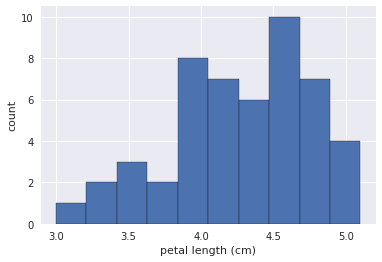

In [3]:
#Nos creamos el histograma
_ = plt.hist(versicolor_petal_length, ec = 'black')
#Añadimos los ejes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')
#Mostramos el histograma
plt.show()

Otra de la parte importante a la hora de realizar un histograma es ajustar el número de bins. La regla de la raíz cuadrada suele ser una regla muy usada a la hora de decidir el número de bins, es decir, selecccinar la raíz cuadrada del número de elementos que tiene el array al que le vamos a calcular el histograma.

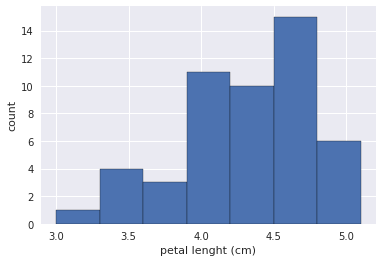

In [4]:
#Calculamos el número de elementos de nuestro array
n_data = len(versicolor_petal_length)
#Aplicamos la regla de la raíz cuadrada para fijar el número de bins
n_bins = np.sqrt(n_data)
#Pasamos el número de bins a un valor entero
n_bins = int(n_bins)
#Nos creamos el histograma
plt.hist(versicolor_petal_length, bins = n_bins, ec = 'black')
plt.xlabel('petal lenght (cm)')
plt.ylabel('count')
#Mostramos el histograma
plt.show()

# Bee swarm plot

El principal problema de los histogramas es que la elección del número de bins es bastante crítico, es decir, un mismo conjunto de datos puede ser interpretado de distinta forma en función del número de bins seleccionado. Para evitar este tipo de problemas tenemos los gráficos Bee Swarm. A continuación vamos a proceder a representar la longitud de los pétalos de las distintas especies florales del dataset Iris, mediante este gráfico.

In [5]:
#Importamos los datos
df = pd.read_csv('iris.csv', header = 0)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


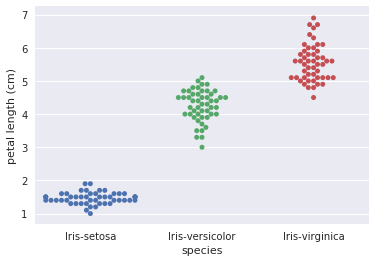

In [6]:
#Nos creamos nuestro gráfico swarm
sns.swarmplot(x = ' species', y = ' petal length (cm)', data = df)
plt.xlabel('species')
plt.ylabel('petal length (cm)')
#Mostramos el gráfico
plt.show()

# Computing the ECDF

A continuación vamos a proceder a crear una función que toma como entrada un array 1D y retorna x,y (valores de necesarios para construir la ECDF). ECDFs se trata de uno de los plot más importantes en el análisis estadístico.

In [7]:
def ecdf(data):
    #Calculamos el número total de puntos que tendrá nuestra ECDF
    n = len(data)
    #Calculamos los valores del eje x, que son los valores de los datos ordenados
    x = np.sort(data)
    #Calculamos el eje y que va desde 1/n hasta 1 de forma equiespaciada
    y = np.arange(1, len(x) + 1)/n
    return x,y

A continuación vamos a proceder a mostrar por pantalla la ECDF de la longitud de los petalos de la flor versicolor.

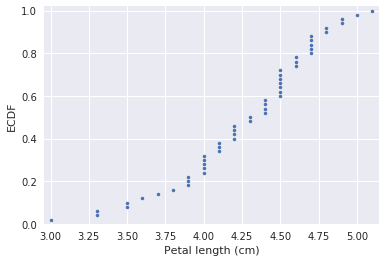

In [8]:
#Llamamos a la fucnión ecdf
x_vers, y_vers = ecdf(versicolor_petal_length)
#Nos creamos el plot
_ = plt.plot(x_vers, y_vers, marker = '.', linestyle = 'none')
#Ajustamos el margen para mantener los datos fuera de la trama
plt.margins(0.02)
#Nombramos los ejes
plt.xlabel('Petal length (cm)')
plt.ylabel('ECDF')
#Mostramos por pantalla
plt.show()

La ECDF nos permite comparar distintas distribuciones (aunque debemos tener encuenta que si queremos comparar un elevado número este plot puede resultar confuso). A continuación vamos a proceder comparar la longitud de los petalos para cada una de las especies.

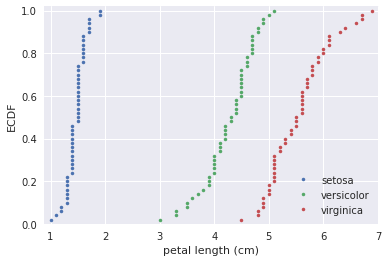

In [9]:
#En primer lugar obtenemos los datos que son necesarios
petal_length_setosa = np.array(df.loc[df[' species'] == 'Iris-setosa', ' petal length (cm)'].tolist())
petal_length_virginica = np.array(df.loc[df[' species'] == 'Iris-virginica', ' petal length (cm)'].tolist())
petal_length_versicolor = np.array(df.loc[df[' species'] == 'Iris-versicolor', ' petal length (cm)'].tolist())

#Una vez tenemos los datos hacemos uso de nuestra función ecdf
x_setosa, y_setosa = ecdf(petal_length_setosa)
x_virginica, y_virginica = ecdf(petal_length_virginica)
x_versicolor, y_versicolor = ecdf(petal_length_versicolor)

#Ahora nos creamos nuestro plot
_ = plt.plot(x_setosa, y_setosa, marker = '.', linestyle = 'none')
_ = plt.plot(x_versicolor, y_versicolor, marker = '.', linestyle = 'none')
_ = plt.plot(x_virginica, y_virginica, marker = '.', linestyle = 'none')

#Ajustamos los márgenes
plt.margins(0.02)

#Nos creamos las leyendas y el nombre de los ejes
plt.legend(['setosa', 'versicolor', 'virginica'], loc='lower right')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

#Mostramos el plot 
plt.show()

En estos gráficos se puede ver de forma clara como la setosa tiene una longitud de petalo bastante menor que la flor versicolor y la flor virgínica, además de tener una menor variabilidad en la longitud de este.

# Mean and Median

La media (mean) se trata de una medida estadística bastante utilizada a la hora de realizar análisis estadísticos. Esta medida nos indica el promedio de una variable. A la hora de calcularla en Python lo podemos hacer mediante el método de la librería numpy np.mean().

In [10]:
#Calculamos la media de la longitud de los pétalos de la flor versicolor
mean_length_vers = np.mean(petal_length_versicolor)
print('I . versicolor: ', mean_length_vers, 'cm')

I . versicolor:  4.26 cm


El principal problema viene cuando estamos en presencia de outliers, ya que estos afectan en gran medida al valor de la media y por lo tanto podemos obtener un valor que no refleje la realidad. En estos casos la mejor opción es hacer uso de otra medida muy usada en análisis estadístico, la mediana. La mediana se define como el valor central de nuestro conjunto de datos ordenados. La librería Numpy dispone del método np.median(), que nos permite calcular esta medida.

In [11]:
#Calculamos la mediana de la longitud de los pétalos de la flor versicolor
median_length_vers = np.median(petal_length_versicolor)
print('Median versicolor: ', median_length_vers, 'cm')

Median versicolor:  4.35 cm


Como podemos existen diferencias entre ambos valores, el valor de la mediana es un valor robusto a outliers, por lo que se trata de un valor más fiable.

# Percentiles and BoxPlots

Los percentiles se tratan de una información bastante valiosa, los más conocidos son el primer percentil (Q1) que representa el 25% de los datos, el segundo percentil (Q2) que representa el 50% o el valor medio de los datos y el tercer percentil (Q3) que representa el 75% de los datos. Para calcular estos percentiles de forma inmediata disponemos dentro de la librería Numpy el método np.percentile(). A este método le pasamos los datos como primer parámetro y como segunda parámetro le pasamos un array de los percentiles que queremos calcular (en porcentaje).

In [12]:
#Nos creamos el array de los percentiles que queremos calcular
percentiles = np.array([2.5, 25, 50, 75, 97.5])
#Calculamos estos percentiles para la longitud del pétalo de la flor versicolor
ptiles_vers = np.percentile(petal_length_versicolor, percentiles)
#Mostramos por pantalla
print(ptiles_vers)

[ 3.3     4.      4.35    4.6     4.9775]


Estos valores nos indican que el 2.5% de la especie versicolor tiene una longitud de pétalo menor a 3.3cm, que el 25% de las especies de la flor versicolor tiene una longitud de pétalo menor a 4.0 cm, etc.

Para ver como ser relaccionan los percentiles calculados con al función ECDF, vamos a proceder a pintar estos percentiles calculados sobre la función ECDF que hemos calculado anteriormente respecto a la especie versicolor. Para ello vamos a representar estos valores como diamantes rojos sobre la gráfica ECDF.

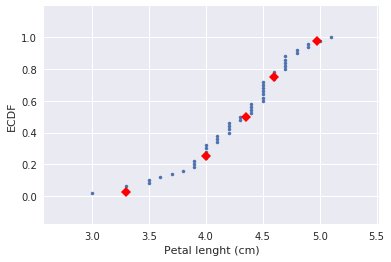

In [13]:
#Obtenemos la ecdf de la longitud del pétalo de la flor versicolor
_ = plt.plot(x_versicolor, y_versicolor, marker = '.', linestyle = 'none')
plt.margins(0.2)
_ = plt.xlabel('Petal lenght (cm)')
_ = plt.ylabel('ECDF')

#Añadimos los percentiles
_ = plt.plot(ptiles_vers, percentiles/100, marker = 'D', color = 'red', linestyle = 'none')

#Mostramos el plot
plt.show()

Realizar un boxplot de la longitud del pétalo del conjunto de datos Iris es innecesario ya que este conjunto de datos es bastante pequeño, pero es buena idea realizarlo para coger un poco de práctica. Para ello vamos hacer uso del estilo seaborn también para el caso del boxplot.

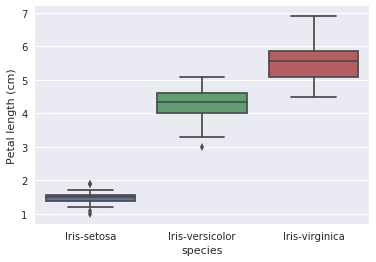

In [14]:
#Nos creamos el boxplot para la longitud de los petalos de cada una de las especies
_ = sns.boxplot(x = ' species', y = ' petal length (cm)', data = df)
#Nombramos los ejes
_ = plt.xlabel('species')
_ = plt.ylabel('Petal length (cm)')
#Mostramos los resultados en pantalla
plt.show()

La línea situada en la parte central de las cajas es la mediana. La mitad de los casos tienen un valor superior a la mediana y la mitad tiene un valor inferior. Igual que la media, la mediana es una medida de la tendencia central. La diferencia como ya hemos indicado es que la mediana se ve menos afectada por los valores extremos (outliers).
La parte ingerior de la caja indica el percentil 25. El 25% de los casos tiene valores por debajo del percentil 25. La parte superior de la caja representa el percentil 75. El 25% de los casos tiene valores por encima del percentil 75. Esto significa que el 50% de los casos se encuentra dentro de la caja. El rango intercuatílico (IQR) es la diferencia entre el percentil 75 y el percentil 25 y corresponde con la longitud de la caja.
Las barras T que se extienden desde las cajas se denominan bigotes. Se extiende hasta el valor mínimo y máximo que es igual o menor que 1.5 veces el IQR del final de una caja. Si los datos están distribuidos con normalidad, se espera que aproximadamente el 95% de los datos se encuentre entre los bigotes.
Un boxplot puede contener valores atípicos marcados como círculos y valores extremos marcados como asteriscos. Los valores atípicos son valores entre 1.5 y 3 veces ek IQR. Los valores extremos estás a más de 3 veces IQR. Estos valores atípìcos pueden provocar que la media y la mediana no coincidan.

# Variance and Standard desviation

La varianza se define como la distancia cuadrada media de los datos respecto a su media. De un forma más coloquial nos indica la dispersión de los datos. Para calcular la varianza la librería Numpy dispone del método np.var(). Es muy importante saber que es lo que hacen los métodos internamente, por lo que a continuación vamos a proceder a calcular la varianza implementando la fórmula y finalmente aplicaremos el método var().

In [15]:
#Calculamos la diferencia de cada valor respecto a la media
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
#Elevamos al cuadrado cada uno de los reseultados
diff_sq = differences ** 2
#Calculamos la media del valor diff_sq
variance_explicit = np.mean(diff_sq)
#Mostramos el resultado por pantalla
print('variance_explicit: ', variance_explicit)

#Calculamos la varianza haciendo uso de numpy 
variance_np = np.var(versicolor_petal_length)
#Mostramos por pantalla los resultados
print('variance_np: ', variance_np)

variance_explicit:  0.2164
variance_np:  0.2164


La varianza es siempre un valor positivo, en caso de que la varianza sea cero esto indica que todos los datos toman un valor idéntico. Si a todos los datos se les suma una constante la varianza sigue siendo la misma. Si todos los datos se multiplican por una constante , la varianza queda multiplicada por el cuadrado de la constante.

La desviación estándar se defina como la raíz cuadrada de la varianza. Numpy también dispone del método np.std() que nos permite calcular la desviación estándar.

In [16]:
#Calculamos la desviación estándar como la raíz cuadrada de la varianza
variance = np.var(versicolor_petal_length)
print(np.sqrt(variance))

#Calculamos la desviación estándar con Numpy
print(np.std(versicolor_petal_length))

0.465188133985
0.465188133985


Una desviación típica elevada significa que los datos están dispersos, mientras que un valor bajo indica que los valores son próximos los unos de los otros , y por lo tanto de la media.
La desviación típica siempre es un número positivo y solo sera igual a cero cuando todas las observaciones de los datos tomen exactamente el mismo valor. Si le sumamos la misma constante a todas las observaciones la desviación típica no cambia. Si multiplicamos todos los datos por una constante la desviación queda multiplicada por esa constante.

# Covariance and Pearson correlation coefficient

Anteriormente hemos realizado plots del tipo: histogram, swarm plots, box plots y ECDF, mediante estas funciones hemos comparado la longitud del pétalo de las diferentes especies de la flor Iris. ¿Qué ocurre si queremos comparar dos características de una sola especie?. Esto es lo que exactamente nos permite realizar el tipo de gráfico Scatter Plot. A continuación vamos a proceder a crear un gráfico de tipo scatter plot para el caso de la longitud y la anchura de la especie versicolor.

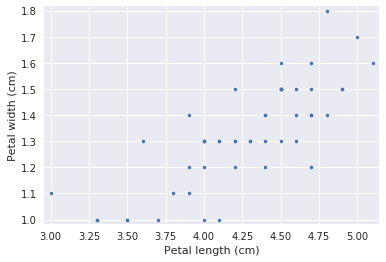

In [17]:
#Extraemos los datos necesarios
versicolor_petal_length = np.array(df.loc[df[' species'] == 'Iris-versicolor', ' petal length (cm)'].tolist())
versicolor_petal_width = np.array(df.loc[df[' species'] == 'Iris-versicolor', ' petal width (cm)'].tolist())
#Nos creamos el scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')
#Ajustamos los márgenes
plt.margins(0.02)
#Nombramos los ejes
_ = plt.xlabel('Petal length (cm)')
_ = plt.ylabel('Petal width (cm)')
#Mostramos el gráfico por pantalla
plt.show()

La covarianza entre dos variables se puede calcular haciendo uso del método np.cov() que nos proporciona la librería Numpy. Esta función nos retorna un array 2D donde la diagonal principal nos indica la varianza de las variables a las cuales les calculamos la covarianza y los otros dos valores son la covarianza entre las dos variables. La covarianza entre dos variables es un valor que indica el grado de variación conjunta de dos variables respecto a sus medias.

In [18]:
#Calculamos la matriz de covarianza
matrix_cov = np.cov(versicolor_petal_length, versicolor_petal_width)
print(matrix_cov)

[[ 0.22081633  0.07310204]
 [ 0.07310204  0.03910612]]


El coeficiente de correlación de Pearson, es a menudo bastante más sencillo de interpretar que la covarianza. Este coeficiente puede ser computado haciendo uso del método np.corrcoef(). Toma dos argumentos y retorna un array 2D en la cual la diagonal principal siempre es uno, ya que representa la correlación consigo mismo de cada uno de los argumentos. Los otros dos valores indican la correlación entre ambos argumentos. El coeficiente de correlación de Pearson es una medida de la relación lineal entre dos variables cuantitativas y a diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.

In [19]:
def pearson_r (x,y):
    '''Función que retorna el coeficiente de Pearson entre
    dos variables'''
    corr_mat = np.corrcoef(x,y)
    return corr_mat[1,0]

print(pearson_r(versicolor_petal_length, versicolor_petal_width))

0.786668088523


El coeficiente de correlación de Pearson toma un valor entre -1 y 1. Si el valor del coeficiente es 1 esto nos indica que existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante. Si el coeficiente esta entre 0 < coeficiente < 1 esto implica que existe una correlación positiva. Si el coeficiente toma el valor de 0, no existe relación lineal. Pero esto no necesariamente implica que las variables sean independientes: pueden existir todavía relaciones no lineales entre las dos variables. Si el coeficiente está entre -1 < coeficiente < 0, esto implica una correlación negativa. Finalmente si el coeficiente toma el valor de -1, esto implica que existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante.

# Probabilistic logic and statistical inference

La inferencia estadística hace referencia a tomar nuestros datos y sacar conclusiones probabilísticas sobre lo que esperaríamos si tomaramos aún más datos del mismo tipo, de forma que podamos tomar decisiones en base a estas conclusiones.

# Random number generators and hacker statistics

El término hacker statistics hace referencia al proceso de simular de forma repetida ciertas medidas para calcular probabilidades. Por ejemplo podemos hacer uso de np.random.random() que nos devuelve un array de números (el número de veces que queremos que se repita el experimento lo fijamos con el parámetro size) entre 0 y 1, de esta forma podemos realizar un experimente de forma que si el valor es menor que 0.5 el resultado sea True y en caso de que sea mayor o igual a 0.5 el resultado sea False, este tipo de experimento es conocido como ensayo de Bernoulli. Un ensayo de Bernoulli se trata de un experimento que solo puede tener dos resultados: exito o fracaso. Si queremos que todos nuestras repeticiones se reproduzcan en las mismas condiciones debemos de fijar la semilla, para ello contamos con np.random.seed(). Por ejemplo vamos a proceder a simular 4 lanzamientos de una moneda y ver cual es el resultado.

In [20]:
#Fijamos la semilla del experimento 
np.random.seed(42)
#Generamos un total de cuatro números aleatorios entre 0 y 1
random_numbers = np.random.random(size = 4)
#Decimos que el resultado será cara si el valor es menor a 0.5
heads = random_numbers < 0.5
#Contamos el número de caras
np.sum(heads)

1

Ahora supongamos que queremos repetir este experimento 10000 veces, y ver la probabilidad de que se produzca cuatro caras seguidas. La probabilidad de conseguir cuatro caras seguidas, será el número de veces que conseguimos cuatro caras seguidas entre el número de intentos realizados.

In [21]:
n_all_heads = 0
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1
        
#Computamos la probabilidad
prob = n_all_heads / 10000
print(prob)

0.0619


Es decir, la probabilidad de conseguir 4 caras seguidas es de un 6%.

A continuación vamos a realizar una serie de llamadas a la función np.random.random() y vamos a representar los resultados en un histograma.

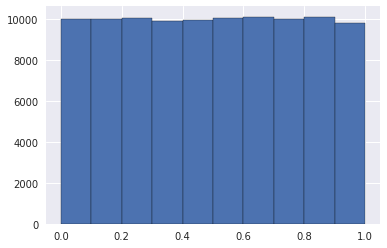

In [22]:
sns.set()
#Fijamos la semilla
np.random.seed(42)
#Nos creamos un numpy array vacía de 100000 posiciones
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

#Nos creamos el histograma
_ = plt.hist(random_numbers, ec = 'black')
#Mostramos por pantalla el histograma
plt.show()

Como ya hemos dicho un experimento de Bernoulli es aquel que solo puede tener dos resultados éxito o fracaso. Donde si la probabilidad de éxito es p entonces la probabilidad de fracaso será 1-p. A continuación vamos a crear una función que lo que hace es repetir un experimento de Bernoulli n veces (tantas veces como nosotros le indiquemos) y retorna el número de éxitos en función de la probabilidad p de éxito que le pongamos de umbral.

In [23]:
def perform_bernoulli_trials(n,p):
    '''Realiza n experimentos de Bernoulli con una probabilidad de éxito p,
    retorna el número de exitos'''
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return(n_success)

Supongamos que un banco concede 100 prestamos, es posible que cualquier número entre 0 y 100 se traten de prestamos incumplidos, es decir, de personas que nunca retornaran el prestamo. Nos gustaria conocer el número de prestamos que se incumpliran de forma predeterminada, conociendo que la probabilidad de incumplimiento es p = 0.05. Para hacer esto podemos simular el experimento de Bernoulli 100 veces. Aquí la concesión de un prestamo incumplido se conoce como éxito.

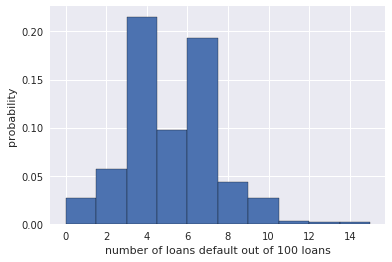

In [24]:
#Fijamos la semilla
np.random.seed(42)
#Inicializamos el número de experimentos que vamos a realizar por defecto en nuestro caso serán 1000
np_defaults = np.empty(1000)
#Repetimos el experimento 1000 veces: es decir, concedemos 100 prestamos y vemos la probabilidad de conceder x 
#prestamos y que estos no sean retornados
for i in range(1000):
    np_defaults[i] = perform_bernoulli_trials(100, 0.05)
#Nos creamos el histograma. La variable normed = True nos permite ver en el eje y del histograma la probabilidad.
_ = plt.hist(np_defaults, normed = True, ec = 'black')
_ = plt.xlabel('number of loans default out of 100 loans')
_ = plt.ylabel('probability')
#Mostramos por pantalla el histograma
plt.show()

Podemos ver como la probabilidad de conceder entre 3 y 4 prestamos fraudulentos es superior al 20%.

A continuación vamos a proceder a mostrar los mismos resultados pero en lugar de histograma vamos hacer uso de la ECDF. 

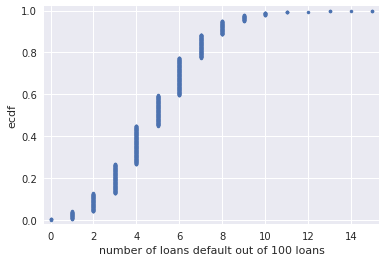

In [25]:
#Hacemos uso de la función ecdf
x , y = ecdf(np_defaults)
#Mostramos los resultados
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of loans default out of 100 loans')
plt.ylabel('ecdf')
plt.margins(0.02)
#Mostramos los resultados por pantalla
plt.show()

Supongamos que el banco comienza a perder dinero cuando el número de prestamos fraudulentos concedidos es mayor o igual 10, es por esto que el banco está interesado en conocer la probabilidad de conceder un total de 10 o más prestamos fraudulentos.

In [26]:
#Calculamos cuantas veces se concedieron más de 10 prestamos fraudulentos
n_lose_money = np.sum(np_defaults >= 10)
#Calculamos la probabilidad
print('Probability of losing money : ', n_lose_money/len(np_defaults) )

Probability of losing money :  0.022


Podemos que la probabilidad de perder dinero es de un 2.2%.

# Probability distributions and stories : The Binomial distribution

Supongamos el experimento de lanzar un dado: este experimento tiene un total de 6 posibles resultados, donde cada resultado tiene la probabilidad de 1/6 de ocurrir. En este caso tenemos un experimento donde el resultado es discreto, es decir, estamos interesados en las probabilidades de resultados discretos, en este caso lo más adecuado es hacer uso de la PMF. Es decir, la PMF(Probability mass function) es una función que da la probabilidad de que una variable aleatoria discreta tome un determinado valor. Se trata de la función principal para definir la distribución de probabilidad discreta.
Por otro lado, una distribución binómica nos indica el número r de éxitos que se han producido en n experimentos Bernoulli con una probabilidad de éxito p. Para ello disponemos de la función np.binomial(), esta función toma 2 argumentos, en primer lugar el número de experimentos de Bernoulli que deseamos realizar y en segunda lugar la probabilidad de éxito.

In [27]:
np.random.binomial(4, 0.5)

2

Si queremos lanzar este experimento una y otra vez también le podemos pasar en el argumento size el número de veces que queremos repetir nuestro experimento.

In [28]:
np.random.binomial(4, 0.5, size = 10)

array([2, 2, 2, 2, 2, 3, 3, 2, 2, 0])

Supongamos el siguiente experimento: una persona piensa un número entre 1 y 10, la probabilidad de acertar dicho número es de 1/10 (nuestra probabilidad de éxito), ahora queremos saber en 60 intentos la probabilidad de acertar 1 vez el número, de acertar 5 veces el número etc. Esto se puede hacer con una ecdf.

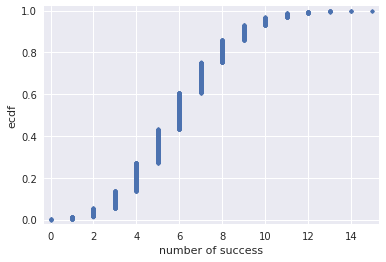

In [29]:
#Simulamos el experimento 10000 veces
np_success = np.random.binomial(60,0.1,10000)
#Nos creamos la ecdf
x, y = ecdf(np_success)
plt.plot(x, y, marker = '.', linestyle = 'none')
plt.xlabel('number of success')
plt.ylabel('ecdf')
plt.margins(0.02)
#Mostramos los resultados por pantalla
plt.show()

Podemos ver que por ejemplo que en el 60% de los intentos se obtuvieron 6 o menos aciertos. A continuación vamos a proceder a realizar el experimento de los prestamos bancarios, pero en este caso se repetirá 10000 veces.

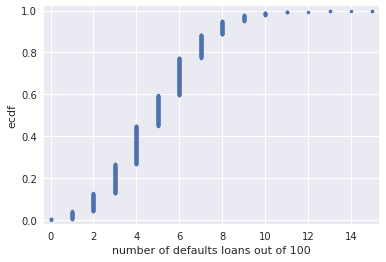

In [30]:
#Fijamos la semilla
np.random.seed(42)
#Creamos un total de 10000 experimentos
n_defaults = np.random.binomial(100, 0.05, size = 10000)
#Nos creamos la ecdf
x, y = ecdf(np_defaults)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('number of defaults loans out of 100')
_ = plt.ylabel('ecdf')
plt.margins(0.02)
#Mostramos los resultados por pantalla
plt.show()

Representar de forma gráfica la función PMF haciendo uso de matplotlib requiere de una serie de trucos que no veremos en este curso. En su lugar vamos a representar la PMF de nuestra distribución binomial mediante un histograma. La clave está en configurar el número de bins con el que vamos a mostrar el histograma. El objetivo es que los bins esten centrados en los números enteros, por lo tanto los bordes de los bins deben estar en -0.5, 0.5, 1.5,2.5... hasta np.max(n_defaults) + 1.5. Se puede generar un array de este tipo  haciendo uso de np.arange() y luego restar 0.5.

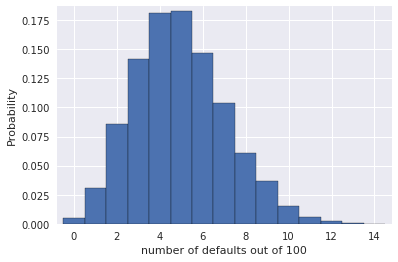

In [31]:
#Nos creamos los bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
#Nos creamos el histograma
_ = plt.hist(n_defaults, bins = bins, normed = True, ec = 'black')
_ = plt.xlabel('number of defaults out of 100')
_ = plt.ylabel('Probability')
plt.margins(0.02)
#Mostramos el histograma por pantalla
plt.show()

# Poisson processes and the Poisson distribution

Un proceso de Poisson es aquel en el cual el evento que ocurre en el instante t + 1 es totalmente independiente del proceso que ocurrió en el instante t. Por ejemplo, lanzar una moneda, es decir, la probabilidad de sacar cara en un intento es totalmente independiente asi en el instante anterior sacamos cara o cruz. Una distribución de Poisson es el número r de llegadas a un proceso de poisson dado un intervalo con un ratio medio de llegadas lambda (por ejemplo en el experimento de lanzar la moneda, sería el número de veces que lanzamos la moneda por minuto). La distribución de Poisson coíncide con el límite de la distribución binomial para eventos raros.
Supongamos que hacemos un ensayo de Bernoulli cada minuto durante una hora, cada uno de estos con una probabilidad de éxito de 0.1. Vamos a realizar 60 ensayos, y la cantidad de éxitos se distribuirá de forma binomial, es por esto que esperamos tener un total aproximado de 6 éxitos. Entonces la distribución de Poisson con tasa de llegada np se aproxima a una distribución binomial para n ensayos de Bernoulli con una probabilidad de éxito p (con n grande y pequeño).

In [32]:
#Nos creamos 10000 ejemplos de una distribución de Poisson con una media de llegada de 10 (np)
np.random.seed(42)
samples_poisson = np.random.poisson(10, size = 10000)
#Mostramos la media y la desviación estandar
print('Poisson: ', np.mean(samples_poisson), np.std(samples_poisson))

Poisson:  10.0186 3.14481383233


In [33]:
#Ahora simulamos esta distribución mediante una binomial de forma que np = 10.
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
for i in range(3):
    samples_bonomial = np.random.binomial(n[i], p[i], size = 10000)
    print('Binomial: ', np.mean(samples_bonomial), np.std(samples_bonomial))

Binomial:  9.9637 2.21634435727
Binomial:  9.9947 3.01358124331
Binomial:  9.9985 3.13937856112


Podemos ver como las medias son prácticamente iguales. Por otro lado la desviación estándar de la distribución binomial se acerca cada vez más a la distribución de Poisson conforme la probabilidad se va haciendo más pequeña.

En beísbol el término no-hitter hace referencia al suceso cuando un equipo no pudo durante todo el partido registrar ni una sola carrera. Se trata de un evento muy poco común que ocurre de forma muy rara,, sabiendo que el número de este tipo de sucesos por temporada es de 251/115. ¿Cuál es la probabilidad de que se produzcan más de 7 sucesos como este en una misma temporada?

In [34]:
np.random.seed(42)
#Ejecutamos un experimento de Poisson con una tasa  de llegada de 251/115
no_hitters = np.random.poisson(251/115, size = 10000)
#Vemos en cuantas ocasiones obtenemos un valor por encima de 7
no_hitters_7 = np.sum(no_hitters >= 7)
#Calculamos la probabilidad
p = no_hitters_7 / 10000
print(p)

0.0067


# Probability density functions

Hasta ahora hemos visto como tratar variables discretas, pero ¿qué ocurre con las variables continuas?. Las variables continuas se tratan de variables que pueden tomar cualquier valor.
Al igual que en las variables discretas disponemos de la PMF, para el caso de variables continuas disponemos de la PDF (probability density functions), que nos muestra la probabilidad relativa de observar un valor de una variable continua, en este caso la probabilidad de que se toma un determinado valor viene dado por el area bajo la curva de la  PDF.

# Introduction to Normal distribution

La distribución normal se trata de una función que viene determinada por dos parámetros: la media (mean) que nos determina el centro del pico y la desviación estándar (standard desviation) que nos determina como de ancho es el pico. No debemos confundir estos valores con los valores obtenidos de los datos, es decir, la media y la desviación estándar de nuestra PDF no debe coincidir necesariamente con la media y la desviación estándar de los datos. Numpy nos permite crear distribuciones normales haciendo uso del método np.numpy.normal(mean, std, size). 

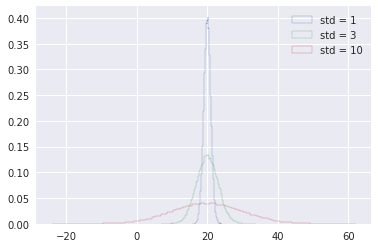

In [35]:
sns.set()
#Nos creamos tres distribuciones con igual media en este caso 20 pero con desviaciones estándar diferentes: 1, 3, 10
normal_std1 = np.random.normal(20, 1, size = 100000)
normal_std3 = np.random.normal(20, 3, size = 100000)
normal_std10 = np.random.normal(20,10, size = 100000)

#Nos creamos los histogramas, para que se parezco más a una PDF vamos hacer uso del parámetro histtype donde le 
#indicamos el tipo de hsitograma que queremos, por defecto este parámetro toma el valor de bar, en nuestro caso 
#seleccionamos el valor de 'step'(https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html).
_ = plt.hist(normal_std1, bins = 100, normed = True, histtype = 'step')
_ = plt.hist(normal_std3, bins = 100, normed = True, histtype = 'step')
_ = plt.hist(normal_std10, bins = 100, normed = True, histtype = 'step')

#Modificamos la leyenda
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.show()

Una vez ya hemos logrado crear nuestra primera PDF, ha llegdo el momento de crear nuestra CDF, que se trata de una función que nos aporta exactamente la misma información que la ECDF pero en este caso para variables continuas.

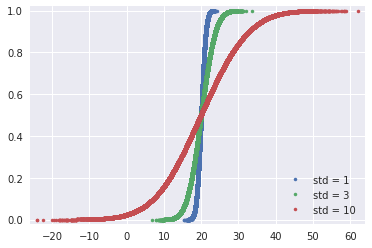

In [36]:
#Obetenos mediante la función ECDF los valores de x, y para cada una de las distribuciones
x_std1, y_std1 = ecdf(normal_std1)
x_std3, y_std3 = ecdf(normal_std3)
x_std10, y_std10 = ecdf(normal_std10)

#Nos creamos los gráficos
_ = plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
_ = plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
_ = plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')

#Ajustamos los márgenes
plt.margins(0.02)

#Modificamos la leyenda
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc = 'lower right')

#Mostramos por pantalla
plt.show()

Como podemos ver todas las CDF pasan por la media en el percentil 50, la media y la mediana en una distribución normal coinciden. El ancho de la CDF varía como era de esperar con la desviación estándar.

Desde 1926 la carrera de Belmont de caballos de 1.5 millas se ha convertido en una de las carreras más famosas. En el año 1973, se produzco el tiempo más rápido en la historia de la carrera, todo lo contrario al año 1970 que se produjeron los tiempos más lentos debido a condiciones climáticas adversas. Teniendo en cuenta los tiempos de los ganadores de esta carrera, comprobar si estos están normalmente distribuidos.

In [37]:
# Cargamos los datos
df = pd.read_csv('belmont.csv')
print(df.head())

   Year            Winner           Jockey             Trainer  \
0  2016           Creator   Irad Ortiz, Jr      Steve Asmussen   
1  2015  American Pharoah  Victor Espinoza         Bob Baffert   
2  2014          Tonalist     Joel Rosario  Christophe Clement   
3  2013     Palace Malice       Mike Smith       Todd Pletcher   
4  2012        Union Rags   John Velazquez        Michael Matz   

                Owner     Time    Track  miles  
0    WinStar Farm LLC  2:28.51  Belmont    1.5  
1  Zayat Stables, LLC  2:26.65  Belmont    1.5  
2     Robert S. Evans  2:28.52  Belmont    1.5  
3      Dogwood Stable  2:30.70  Belmont    1.5  
4    Phyllis M. Wyeth  2:30.42  Belmont    1.5  


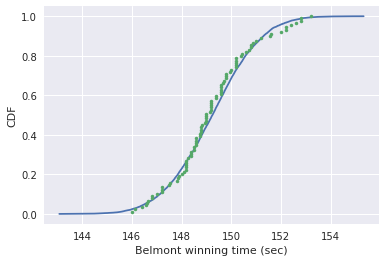

In [38]:
#Nos creamos un array donde eliminamos los dos outliers, es decir, los tiempos del año 1970 y del año 1973 y pasamos
#a segundos el tiempo que se tardó en realizarse la carrera.
belmont_no_outliers = np.array([ 148.51,  146.65,  148.52,  150.7 ,  150.42,  150.88,  151.57,
        147.54,  149.65,  148.74,  147.86,  148.75,  147.5 ,  148.26,
        149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
        152.02,  146.82,  149.97,  146.13,  148.1 ,  147.2 ,  146.  ,
        146.4 ,  148.2 ,  149.8 ,  147.  ,  147.2 ,  147.8 ,  148.2 ,
        149.  ,  149.8 ,  148.6 ,  146.8 ,  149.6 ,  149.  ,  148.2 ,
        149.2 ,  148.  ,  150.4 ,  148.8 ,  147.2 ,  148.8 ,  149.6 ,
        148.4 ,  148.4 ,  150.2 ,  148.8 ,  149.2 ,  149.2 ,  148.4 ,
        150.2 ,  146.6 ,  149.8 ,  149.  ,  150.8 ,  148.6 ,  150.2 ,
        149.  ,  148.6 ,  150.2 ,  148.2 ,  149.4 ,  150.8 ,  150.2 ,
        152.2 ,  148.2 ,  149.2 ,  151.  ,  149.6 ,  149.6 ,  149.4 ,
        148.6 ,  150.  ,  150.6 ,  149.2 ,  152.6 ,  152.8 ,  149.6 ,
        151.6 ,  152.8 ,  153.2 ,  152.4 ,  152.2 ])

#Calculamos la media y la desviación estándar de los tiempos
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

#Nos creamos una distribución normal con dicha media y desviación estándar
normal_distribution = np.random.normal(mu, sigma, size = 10000)

#Nos cremaos la CDF para la distribución normal y para los datos originales
x_normal, y_normal = ecdf(normal_distribution)
x, y = ecdf(belmont_no_outliers)

#Nos creamos ambos plots y los mostramos por pantalla
_ = plt.plot(x_normal, y_normal)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Belmont winning time (sec)')
_ = plt.ylabel('CDF')

#Mostramos los resultados por pantalla
plt.show()

La CDF teórica y la ECDF real, sugiere que los tiempos de los ganadores de la carrera de Belmont están distribuidos de formal normal. Esto sugiere que en los últimos 100 años más o menos, no se han producido avances tecnológicos o de entrenamiento importantes que hayan afectado de forma significativa a la velocidad de los caballos. 

Sabiendo que los datos están normalmente distribuidos (eliminado los tiempos de los años 1970 y 1973), ¿cuál es la probabilidad de que un caballo supere el tiempo marcado en el año 1973 (tiempo más rápido hasta la fecha)?

In [39]:
#Realizamos una simulación de un millón de ejemplos
samples = np.random.normal(mu, sigma, size = 1000000)
#Obtenemos la probabilidad
p = np.sum(samples <= 144)/1000000
print('Probability of besting Secretariat: ', p)

Probability of besting Secretariat:  0.00058


# Exponential Distribution

El tiempo de espera entre la llegada de un proceso de Poisson es exponencialmente distribuido. Puede pasar que en ciertas ocasiones la distribución que describe nuestros datos no sea conocida, cuando esto pasa no debemos entrar en pánico, ya que siempre podemos simular esto. Otra situación rara que se da con poca frecuencia en un partido de Beísbol es cuando un bateador consigue batear el ciclo, es decir, obtiene los cuatro golpes: simple, doble, triple y home run en un solo juego. Al igual que los no-hitters esto puede ser modelado con un proceso de Poisson por lo que el tiempo que transcurre hasta la ocurrencia del suceso también se distribuye de forma exponencial.
¿Cuál es el tiempo que debemos esperar para ver ambos sucesos?. La idea es que tenemos que esperar un tiempo para ver un suceso y tras esto esperar otro tiempo para ver el otro suceso, dicho de otra manera, ¿cuál es el tiempo de espera total para la llegda de dos procesos de Poisson diferentes?. El tiempo total de espera es la suma de ambos tiempos.

In [40]:
def sucessive_poisson(tau1,tau2, size = 1):
    '''Function that returns the waiting time for two  poisson processes to occur'''
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

Sabiendo que la media para que suceda un no-hitter es de 765 partidos y para que ocurra un cycle es de 715 partidos, vamos hacer de la función para computar el tiempo de espera para que se produzcan estos dos procesos.

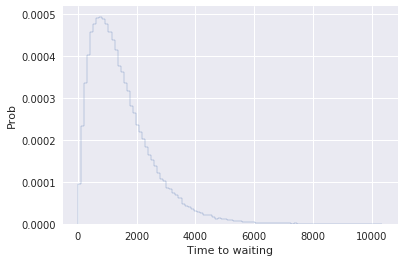

In [41]:
#Realizamos el experimento de calcular el tiempo de espera 100000 veces
waiting_times = sucessive_poisson(765, 715, size = 100000)
#Mostramos la PDF
_ = plt.hist(waiting_times, bins = 100, normed = True, histtype = 'step')
_ = plt.xlabel('Time to waiting')
_ = plt.ylabel('Prob')
plt.show()

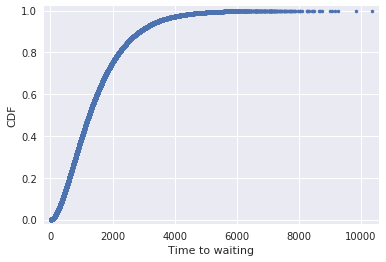

In [42]:
#Nos creamos la CDF
x, y = ecdf(waiting_times)
_  = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Time to waiting')
_ = plt.ylabel('CDF')
plt.margins(0.02)
plt.show()

Podemos ver como para asegurarnos ver este suceso tendremos que esperar alrededor de 8000 partidos. Tendremos que esperar alrededor 1500 partidos en el 60% de los casos.

# Optimal parameters

El número de partidos jugados que se produjeron hasta que se produzco el suceso no-hitter es el siguiente

In [43]:
no_hitters_time = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

Si asumimos que estos están descritos mediante un proceso de Poisson, entonces el tiempo entre no-hitters es exponencialmente distribuido. La distribución tiene un solo parámetro (tau), que es el intervalo de tiempo entre sucesos. El valor de tau que hace que la distribución exponencial se ajuste más a los datos es el promedio. A continuación vamos a proceder a simular con el valor medio calculado a partir de los datos el experimento 100000 veces y realizaremos una aproximación de la PDF.

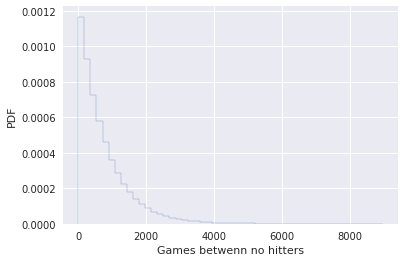

In [44]:
sns.set()
#Fijamos la semilla
np.random.seed(42)
#Calculamos la media a partir de los datos
tau = np.mean(no_hitters_time)
#Realizamos nuestra distribución exponencial
exponential_distribution_theor = np.random.exponential(tau, size = 100000)
#Nos creamos nuestra PDF
_ = plt.hist(exponential_distribution_theor, bins = 50, normed = True, histtype = 'step')
_ = plt.xlabel('Games betwenn no hitters')
_ = plt.ylabel('PDF')
#Mostramos por pantalla
plt.show()

Acabamos de modelar nuestro problema como una distriución exponencial. Para ver que esto es correcto, podemos calcular la ECDF de los datos reales y superponerla a la CDF de los datos simulados.

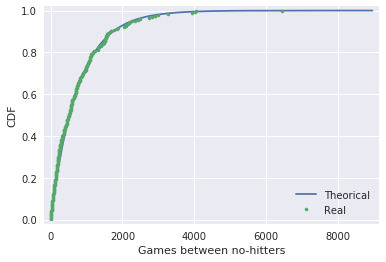

In [45]:
#Nos creamos la ECDF de los datos reales
x, y = ecdf(no_hitters_time)
#Nos creamos la CDF de los datos teóricos
x_theor, y_theor = ecdf(exponential_distribution_theor)
#Superponemos ambos datos
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')
plt.legend(['Theorical', 'Real'], loc = 'lower right' )
#Mostramos por pantalla
plt.show()

Como podemos ver la gráfica teórica y la real se asemejan bastante bien, por lo que parece ser que el  número de juegos en los que se producen los no-hitters es exponencialmente distribuido. Es decir, esto sugiere que se tratan de procesos aleatorios, es decir, que suceda un no-hitter en un determinado instante de tiempo es totalmente independiente a cuando sucedió un no-hitter en el instante de tiempo anterior.

Ahora nos podríoa venir la pregunta a la cabeza si el valor óptimo de tau, para reproducir nuestro experimento es la media. La única forma de ver esto es reproducir nuestro experimento con distintas valores de Tau, y ver como se comporta. A la hora de realizar esto debemos asegurarnos de que fijamos nuestra semilla.

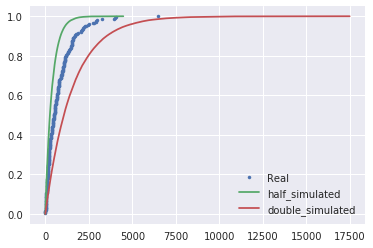

In [46]:
#Fijamos la semilla
np.random.seed(42)
#Simulamos una distribución exponencial con valor de tau/2
samples_half = np.random.exponential(tau/2, 100000)
#Simulamos una distribución exponencial con valor de 2*tau
samples_double = np.random.exponential(2*tau, 100000)
#Nos creamos las CDFs
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)
#Nos creamos los gráficos 
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)
_ = plt.legend(['Real', 'half_simulated', 'double_simulated'], loc = 'lower right')
#Mostramos los resultados por pantalla
plt.show()

Podemos ver como ninguno de estos valores se aproximan a los datos reales, por lo que el valor de la media es el más adecuado.

# Linear regression by least squares

En el siguiente ejercicio veremos la correlación existente entre el alfabetización y la fecundidad femenina (promedio de hijos que tiene una mujer) en el mundo. Para hacer más fácil el análisis trabajaremos con la tasa de analfabetismo. Siembre es una buena idea hacer algo de EDA antes de nuestro análisis. Para ello vamos a representar la tasa de analfabetismo frente a la fertilidad y vamos a calcular su coeficiente de Pearson.

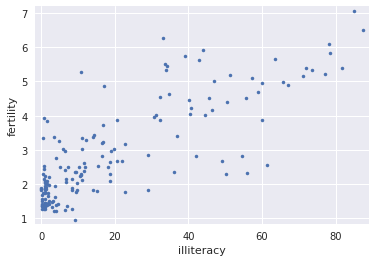

In [47]:
#Array con la tasa de analfabetismo en el mundo 
np_illiteracy = np.array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

#Array que contiene la tasa de fertilidad en el mundo 
np_fertility = np.array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

#Creamos un scatter-plot de illiteracy vs fertility
_ = plt.plot(np_illiteracy, np_fertility, marker = '.', linestyle = 'none')
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [48]:
#Calculamos el coeficiente de Pearson
pearson_coef = np.corrcoef(np_illiteracy, np_fertility)[0,1]
print(pearson_coef)

0.804132402682


Si asumimos que la fertilidad es una función lineal del analfabetismo, esto quiere decir que están relaccionados mediante la expresión f = ax + b, donde a es la pendiente y b es la intersección de la recta con el eje y. Podemos pensar que la intersección es el ratio mínimo de fertilidad. Por otro lado la pendiente nos indica el ratio de variación de la ferlitidad con el analfabetismo. Para encontrar la línea que más se ajusta a nuestros datos podemos hacer uso de np.polyfit().

In [49]:
#Realizamos el scatter plot
_ = plt.plot(np_illiteracy, np_fertility, marker = '.', linestyle = 'none')
_ = plt.xlabel(' percent Illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
#Calculamos el valor de la pendiente y de la intersección
a, b = np.polyfit(np_illiteracy, np_fertility, 1)
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

slope = 0.0497985480906 children per woman / percent illiterate
intercept = 1.88805061064 children per woman


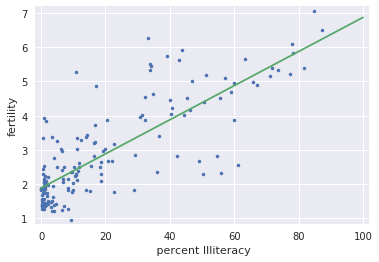

In [50]:
# Para obtener el mejor valor de la recta tomamos x = 0 e x = 100.
x = np.array([0,100])
y = a*x + b
#Representamos la línea
plt.plot(x, y)
#Mostramos el resultado por pantalla
plt.show()

La función np.plyfit(), encuentra los valores óptimos para la pendiente y para la intersección. Esto se hace optimizando la suma de los cuadrados de los residuos también conocido como RSS(for residual sum of squares). A continuación vamos a trazar la función que se está optimizando. Para hacer esto, fijamos la intersección, y finalmente gráficamos RSS vs pendiente.

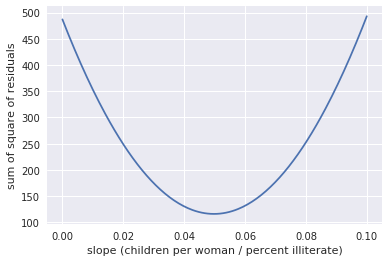

In [51]:
#Computamos los distintos valores que va tomar la pendiente, en este caso serán puntos uniformemente distribuidos 
#entre 0 y 0.1, tomamos un total de 200 puntos.
a_vals = np.linspace(0, 0.1, 200)

#Nos creamos un array con igual dimensión y tipo que a_vals
rss = np.empty_like(a_vals)
#La función enumerate retorna el índice y el valor de cada elemento de nuestra array
for i, a in enumerate(a_vals):
    rss[i] = np.sum((np_fertility - a*np_illiteracy - b)**2)

plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')
plt.show()

Podemos ver como el valor mínimo del plot, es el valor de la pendiente que da la suma mínima del cuadrado de los residuos. Este valor es el mismo que se obtuvo a la hora de realizar la regresión.

# The importance of EDA : Anscombe data

Antes de comenzar a calcular ningún tipo de estadística, o de aplicar ningún modelo debemos de realizar un análisis exploratio, EDA(Exploratory Data Analysis). Para prácticar vamos a proceder a realizar este análisis al conjunto de datos Anscombe.

In [52]:
x_anscombe = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y_anscombe = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26, 
                       10.84,   4.82,   5.68])

#En primer lugar vamos aplicar una regresión lineal, para ello obtenemos los valores óptimos de la pendiente y de la
#intersección
a, b = np.polyfit(x_anscombe, y_anscombe, 1)
print(a, b)

0.500090909091 3.00009090909


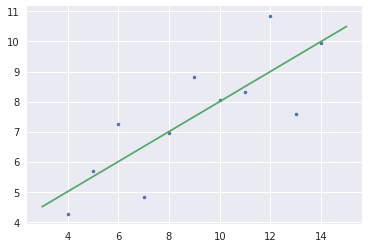

In [53]:
#Ahora nos creamos nuestros valores x, y teóricos
x_theor = np.array([3, 15])
y_theor = a * x_theor + b
#Nos creamos un scatter plot y sobre los datos tiramos la recta de regresión
_ = plt.plot(x_anscombe , y_anscombe, marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)
plt.show()

A continuación vamos a mostrar como todos los datos de anscombe tienen la misma pendiente e interección

In [54]:
x_anscombe = [np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 np.array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]

y_anscombe = [np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
         10.84,   4.82,   5.68]),
 np.array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13,
         7.26,  4.74]),
 np.array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39,
          8.15,   6.42,   5.73]),
 np.array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 ,
          5.56,   7.91,   6.89])]

for x, y in zip(x_anscombe, y_anscombe):
    a, b = np.polyfit(x, y, 1)
    print('slope:' , a, ' Intercept:', b)

slope: 0.500090909091  Intercept: 3.00009090909
slope: 0.5  Intercept: 3.00090909091
slope: 0.499727272727  Intercept: 3.00245454545
slope: 0.499909090909  Intercept: 3.00172727273


# Bootstrap confidence intervals

Se define bootstrap como el remuestreo de los datos para mejorar la inferencia estadística. Un ejemplo bootstrap será el remuestreo de un array de los datos y un replicate bootstrap se define como el resultado estadística tras la operación de remuestreo. Para hacernos una idea de como funciona el bootstrap, supongamos que tenemos el siguiente conjunto de datos [-1,0,1], un bootstrapping de estos datos podría ser [1,1,1] o [1,1,0], etc.

A continuación vamos a proceder a generar ejemplos bootstrap a partir de datos que representan las precipitaciones anuales entre 1883 y 2015 en la ciudad de Sheffield (UK). Estos datos se almacenan en la array rainfall y las unidades son mm.

In [55]:
rainfall = np.array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

A continuación vamos a proceder a representar la ECDF del bootstrapping para ver como esto nos permite obtener medidas probabilísticas de nuestros datos.

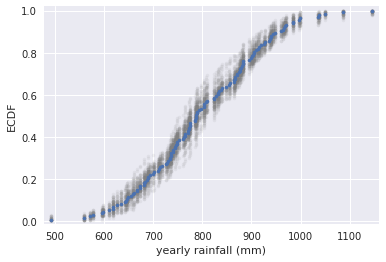

In [56]:
sns.set()
#Nos creamos un bucle for para repetir el experimento 50 veces
for _ in range(50):
    #Calculamos bootstrap, calculamos ecdf y creamos el plot
    bs_sample = np.random.choice(rainfall, size = len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y , marker = '.', linestyle = 'none', color = 'gray', alpha = 0.1)
    
#Nos creamos la ecdf de los datos originales y nos creamos el plot
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
#Mostramos los resultados por pantalla
plt.show()

Como podemos los puntos grises se ajustan bastante bien a los datos reales. A continuación vamos a proceder a crearnos la función draw_bs_reps(data, func, size= 1), la cual nos permite replicar bootstrap a partir de nuestro conjunto de datos. 

In [57]:
def draw_bs_reps(data, func, size = 1):
    '''Drawn bootstrap replicates'''
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = func(np.random.choice(data, size = len(data)))
    return bs_replicates

A continuación vamos a proceder a calcular la PDF de la precipitación media anual en la ciudad de Sheffield. Para esto calcularemos la media entre los años 1883 y 2015 una y otra vez haciendo uso de la función anterior.

In [58]:
#Replicamos el experimento de calcular la media 10000 veces
bs_mean = draw_bs_reps(rainfall, np.mean, size = 10000)

Podemos demostrar que el valor de la media en condiciones no demasiado restrictivas se distribuirá normalmente (esto no es algo que se cumpla de forma general solo para la media y otras variables estadísticas). La desviación estándar de esta distribución, llamada error estándar de la media (SEM), viene dada por la desviación estándar de los datos dividida entre la raíz cuadrada del número de puntos.

In [59]:
sem = np.std(rainfall)/np.sqrt(len(rainfall))
print(np.std(bs_mean), sem)

10.5160413227 10.5105491505


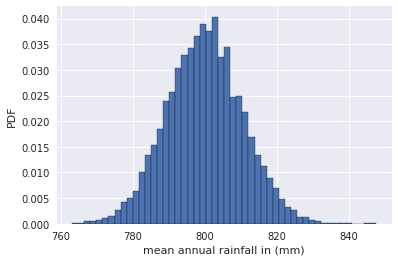

In [60]:
#Nos creamos el histograma del bootstrap
_ = plt.hist(bs_mean, normed = True, ec = 'black', bins = 50)
_ = plt.xlabel('mean annual rainfall in (mm)')
_ = plt.ylabel('PDF')
#Mostramos los resultados
plt.show()

El intervalo de confianza es cuando repetimos una medida una y otra vez, y un porcentaje p de los valores observados se encuentra dentro de nuestro p intervalo de confianza.

In [61]:
np.percentile(bs_mean, [2.5, 97.5])

array([ 779.45105263,  820.60986842])

Podemos ver que los valores que se encuentran en el 95% de confianza de nuestro estadístico (en este caso la media) son los que se encuentra entre 780 y 821. Es decir el promedio de precipitaciones se encuentra entre esos valores.

Ya hemos visto que la media tiene una distribución normal, pero esto no ocurre con todos los estadísticos. En el siguiente ejercicio vamos hacer uso del bootstrap para la varianza anual de precipitaciones en la ciudad de Sheffield.

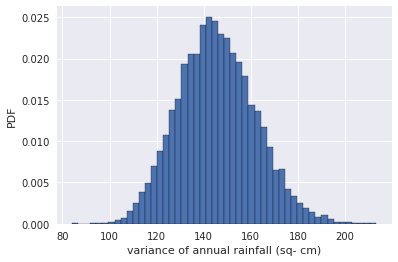

In [62]:
#Nos creamos el experimento 10000  veces para la varianza
bs_replicates = draw_bs_reps(rainfall, np.var, size = 10000)
bs_replicates = bs_replicates/100
#Nos creamos el histograma
_ = plt.hist(bs_replicates, bins = 50, ec = 'black', normed = True)
_ = plt.xlabel('variance of annual rainfall (sq- cm)')
_ = plt.ylabel('PDF')
#Mostramos los resultados por pantalla
plt.show()

Esta distribución parece, pero no es normal, ya que podemos ver que la cola de la derecha es un tanto más alargada que la cola de la izquierda.

Hasta ahora hemos visto como aplicar la técnica bootstrap aplicada a un único parámetro, pero que ocurre cuando queremos aplicar esta técnica a dos o más parámetros. Por ejemplo queremos replicar el resultado obtenido tras realizar una regresión lineal.

In [63]:
def draw_bs_pairs_linreg(x, y, size = 1):
    '''Perform bootstrap for linear regresion'''
    inds = np.arange(len(x))
    bs_slope = np.empty(size)
    bs_intercept = np.empty(size)
    for i in range(size):
        bs_inds = np.random.choice(inds, size = len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope[i], bs_intercept[i] = np.polyfit(bs_x, bs_y, 1)
    return bs_slope, bs_intercept

A continuación vamos hacer uso la función anterior para ver el intervalo de confianza de la pendiente, en la regresión entre la fertilidad y el analfabetismo.

[ 0.04443935  0.0553048 ]


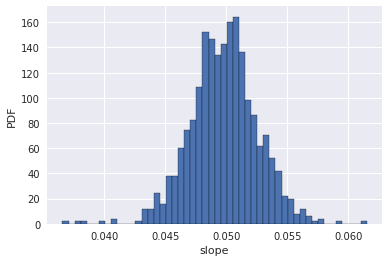

In [64]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(np_illiteracy, np_fertility, size = 1000)
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True, ec = 'black')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

La mejor forma de ver como varía una regresión lineal es representándola gráficamente.

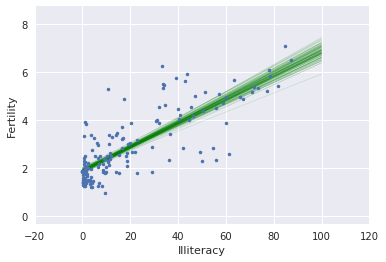

In [65]:
x = np.array([0,100])
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], color = 'green', linewidth = 0.5, alpha = 0.2)

_ = plt.plot(np_illiteracy, np_fertility, marker = '.', linestyle = 'none')
_ = plt.xlabel('Illiteracy')
_ = plt.ylabel('Fertility')
plt.margins(0.2)
#Mostramos los resultados por pantalla
plt.show()

# Introduction to hypothesis testing

Pueden existir situaciones en las cuales la intuición nos dice que dos tipos de datos deberían parecerse estadísticamente, es decir, tener una función de distribución parecida. Para simular esto y comprobar que esto que pensamos es correcto, tenemos lo que se conoce como tests de hipotesis. Un test de hipotesis nos permite observar como de razonables es nuestra suposición, considerando que nuestra suposición o hipotesis es correcta. Para realizar esto debemos mezclar los dos datasets (la misma proporción de ambos si es posible) y tras mezclar nos creamos dos muestras nuevas de igual dimensión. Para concatenar dos conjuntos de datos contamos con la función np.concatenate(), que le pasamos una tupla de datos que queremos concatenar. Para mezclar estos datos de forma aleatorio contamos con la función np.random.permutation(), que le pasamos como parámetros los datos que queremos permutar.

In [66]:
def permutation_sample(data1, data2):
    '''Función que nos genera una permutación de muestas a partir de dos conjuntos de datos'''
    #Concatenamos los dos datasets
    data = np.concatenate((data1, data2))
    #Permutamos los datos
    permutate_data = np.random.permutation(data)
    #Hacemos una selección de los datos
    permutate_data1 = permutate_data[:len(data1)]
    permutate_data2 = permutate_data[len(data1):]
    return permutate_data1, permutate_data2

Para ver como funciona la permutación de datos, vamos a proceder a permutar estos datos y vamos a permutar dos conjuntos de datos y vamos a proceder a realizar una visualización del resultado.

Usaremos los datos sobre las precipitaciones en la ciudad de Sheffield durante los meses de Julio y Noviembre. Esperamos que las distribuciones de estos meses sea bastante diferente, por lo que vamos a ver como se verían sus CDFs si estuviesen identicamente distribuidos.

In [67]:
rain_july = np.array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = np.array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

A continuación vamos a realizar un bucle for y realizaremos el experimento durante 50 veces. Es decir, el flujo será el siguiente: suponemos que las precipitaciones de Julio y Noviembre tienen la misma distribución, para ello simulamos las permutaciones 50 veces. Tras esto visualizaremos la ECDF de estas permutaciones, y las ECDFs de los datos originales de Junio y Julio, si nuestra hipotesis es cierta la ECDF de la simulación debería superponerse sobre alguna de los datos orginales.

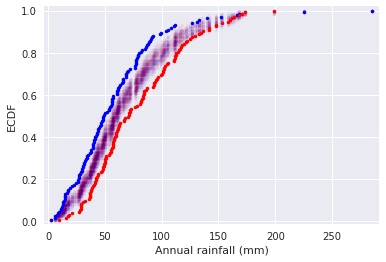

In [68]:
sns.set()
#Nos creamos el bucle para repetir nuestro experimento 50 veces
for i in range(50):
    perm_sample1, perm_sample2 = permutation_sample(rain_july, rain_november)
    #Obtenemos la ECDF para cada una de las muestras permutadas
    x_1, y_1 = ecdf(perm_sample1)
    x_2, y_2 = ecdf(perm_sample2)
    #Nos creamos los plots para cada una de las ECDFs
    _ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.02)
    _ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', color = 'red', alpha = 0.02)

#Calculamos las ECDFs de nuestros datos originales
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
#Nos creamos los plots
_ = plt.plot(x_1, y_1, marker = '.', color = 'blue', linestyle = 'none')
_ = plt.plot(x_2, y_2, marker = '.', color = 'red', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('Annual rainfall (mm)')
_ = plt.ylabel('ECDF')
#Mostramos los resultados por pantalla
plt.show()

Podemos ver como el resultado de nuestra hipotesis de suponer que ambos datos seguían la misma distribución se superponen formando una nube de puntos morada. Podemos ver como ninguna de las ECDFs de nuestros datos permutados se solapa con los datos observados, lo que sugiere que nuestra hipótesis es falsa. Es decir, las precipitaciones de Julio y Noviembre no están idénticamente distribuidas.

# Test statistics and p-values

Definimos un test estadístico como un número único que puede calcularse a partir de los datos observados y de datos que se simular bajo una hipotesis nula.

A la hora de realizar nuestras pruebas de hipótesis, la elección de nuestra medida estadística debería ser adecuada en función a la pregunta que deseamos responder con nuestra hipótesis.

Definimos el p-value como la probabilidad de observar un test estadístico igual o más extremo que uno que ya hemos observado suponiendo que la hipótesis asumida es cierta.

Una replica de permutación se trata de un valor de una medida estadística calculada a partir de una muestra de permutación. Al igual que anteriormente calculamos una función que nos permitia crear la muestra de permutación a continuación vamos a crear una función que nos permite crear una replica de permutación.

In [69]:
def draw_perm_reps(data_1, data_2, func, size=1):

    # Inicializamos la array que queremos replicar
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generamos los ejemplos permutados
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        # Calculamos el test estadístico
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

Los científicos Kleinteich y Gorb en el año 2014 realizaron el siguiente experimento con las ranas sudamericanas: sostuvieron una placa conectada a un transductor de fuerza, junto con una mosca de cebo, de esta forma lograron medir el impacto la fuerza adesiva de la lengua de una rana cuando esta impactaba con la mosca. Lo que hicieron fue tomar 20 muestras de una rana adulta (A) y de una rana joven (B). Vamos a suponer como hipótesis que ambas ranas tiene el mismo impacto. Pero antes vamos a proceder a visualizar nuestros datos.

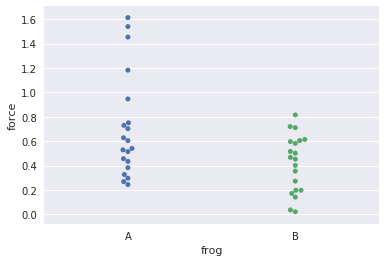

In [70]:
#Cargamos el dataframe donde se encuentran los datos
force = [1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515
         ,0.435,0.383,0.457,0.730,0.172,0.142,0.037,0.453,0.355,0.022,0.502,0.273,0.720,0.582,0.198,0.198
         ,0.597,0.516,0.815,0.402,0.605,0.711,0.614,0.468]
id_frogA = ['A']
id_frogB = ['B']
ID = id_frogA * 20 + id_frogB*20
dict_data = {'ID': ID, 'force': force}
#Nos creamos un DataFrame a partir de los datos
df = pd.DataFrame(dict_data)
#Creamos un grafo de tipo swarmplot
_ = sns.swarmplot(x = 'ID', y = 'force', data = df)
_ = plt.xlabel('frog')
_ = plt.ylabel('force')
#Mostramos los datos por pantalla
plt.show()

A simple vista parece claramente que ambas ranas no tienen la misma distribución. La rana adulta parece ser que tiene 3 golpes muy fuertes mientras que la rana joven tiene dos golpes bastante flojos. Pero es muy complicado afirmar esto con tan solo 20 ejemplos, es por esto que vamos a proceder a realizar un test de hipotesis.

El promedio de fuerza de una rana A es de 0.71N, mientras que para la rana B fue de 0.42N, es decir, la diferencia es de 0.29N. Es posible que las ranas atacasen con las misma fuerza y esta diferencia se observase por casualidad. A continuación vamos a proceder a calcular la probabilidad de obtener al menos una diferencia de 0.29N en la fuera media de ataque en las mismas condiciones (p-value).

In [71]:
np.random.seed(42)
def diff_of_means(data_1, data_2):
    'Función que calcula la diferencia de medias entre dos conjuntos de datos'
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

#Computamos la diferencia empirica de los datos
force_a = np.array(df[df['ID'] == 'A']['force'].tolist())
force_b = np.array(df[df['ID'] == 'B']['force'].tolist())
empirical_diff = diff_of_means(force_a, force_b)

#Realizamos la replica
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size = 10000)

#Calculamos el p_value
p_value = np.sum(perm_replicates >= empirical_diff)/len(perm_replicates)
print(p_value)

0.0063


Este valor de p-value nos indica que en un 0.6% de obtener la diferencia de medias observada en este experimento siendo ambas ranas exactamente iguales. Generalmente se dice, que un p-value por debajo de 0.01 es estadísticamente significativo. Pero ojo no debemos pensar que un p-value de 0.0058 es lo mismo de significativo que 0.00000000000058. Es decir, si nuestra hipotesis nula es que las ranas tienen igual distribución, esto nos dice que existe una probabilidad de 0.0058 de que esto sea cierto, es decir, debemos rechazar la hipotesis nula.

# Bootstrap hypothesis test

El pipeline a la hora de realizar un test estadístico es el siguiente:
    
    * Definimos de forma clara nuestra hipotesis nula.
    
    * Seguidamente debemos de definir nuestro test estadístico, es decir, debemos de seleccionar de forma adecuada 
      la medida que vamos a usar (media, varianza, desviación estándar etc)
      
    * Tras esto simulamos una y otra vez nuestro conjunto de datos asumiendo que nuestra hipotesis nula es True.
    
    * Calculamos nuestro test estadístico para cada uno de los datasets simulados, es decir, calculamos la medida que  
      hemos decidido calcular para cada una de nuestras simulaciones.
      
    * Obtenemos el p-value, que no es otra cosa que la fracción entre el número de veces que nuestro test 
      estadístico ha obtenido un valor tan extremo o más que el test estadístico sobre los datos originales.

Supongamos ahora que añadimos una tercera rana C y queremos ver si esta rana C y la rana B tienen un impacto similar de fuerzas. Desgraciadamente no conoces el conjunto de datos de la rana C, tu única información es que el promedio para esta rana es de 0.55N. Puesto que no tenemos los datos orignales, no podemos hacer uso de la permutación de datos y ver si estas tienen una función de distribución parecida. Debemos de realizar por lo tanto otro tipo de test, vamos a realizar la hipótesis de que el promedio de fuerzas de la rana B y de la rana C es igual. Es decir, el objetivo es calcular el p-value (la probabilidad de que la fuerza de la rana B es menor o igual a 0.55 suponiendo que ambas tienen igual impacto de fuerzas.

In [72]:
#Hacemos un array que translada el impacto de fuerzas, para esto debemos restar a la fuerza de la rana b, su propia 
#media y tras esto sumarle el promedio de la rana C, es decir, 0.55.
translate_forceb = force_b - np.mean(force_b) + 0.55

#Replicamos los datos de translate_forceb
bs_replicates = draw_bs_reps(translate_forceb, np.mean, size = 10000)

#Calculamos el p-value asumiendo hipotesis nula True.
p_value = np.sum(bs_replicates <= np.mean(force_b))/10000
print('p: ', p_value)

p:  0.0061


Un p-value tan bajo hace indicar que lo hipotesis nula de que la rana B y la rana C tienen el misma impacto de fuerzas es falsa.

Hasta ahora hemos realizado bootstrap de test estadístico con una muestra de datos, podemos realizar esto para dos muestras, por ejemplo para comprobar si las ranas A y B tienen el mismo impacto de fuerzas. Para realizar esto vamos a tomar dos arrays n1 y n2 como entrada y haremos un procedimiento similar al test de permutación. Para esto concatenamos las matrices, y generamos una muestra de arranque con las n1 primeras entradas pertenecientes al conjunto n1 y las últimas n2 pertenecientes al conjunto n2. Tras esto computamos nuestro test estadístico por ejemplo la diferencia de medias, para obtener un bootstrap replicado. El p-value es el número de bootstrap replicados para los cuales el test estadístico es menor que nuestras observaciones.

In [73]:
np.random.seed(42)
#Obtenemos la diferencia empírica de medias
empirical_diff_means = diff_of_means(force_a, force_b)
#Concatenamos ambas fuerzas en un array
forces_concat = np.concatenate((force_a, force_b))
#Inicializamos el bootstrap donde vamos a guardar nuestras replicas
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_sample = np.random.choice(forces_concat, size = len(forces_concat))
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)], bs_sample[len(force_a):])

p_value = np.sum(bs_replicates >= empirical_diff_means)/len(bs_replicates)
print('p-value: ', p_value)

p-value:  0.0055


Podemos recordar que haciendo el test permutado para este mismo ejemplo obtuvimos un p_value de 0.0063, y ahora hemos obtenido un valor de 0.0055. Ambos valores están muy cercanos y ambas pruebas retornan el mismo resultado. Sin embargo el test de permutación simula exactamente la hipótesis nula de que los datos provienen de la misma distribución, mientras que la prueba bootstra lo hace de forma aproximada. Sin embargo la prueba bootstrap aunque es aproximada es más versatil.

Ya hemos visto que a la hora de probar que dos muestras tienen la misma distribución se puede realizar con una prueba de bootstrap, pero se prefiere una prueba de permutación ya que esta es más precisa. Pero la prueba de permutación tiene ciertos límites. Supongamos que ahora queremos probar que la rana A y la rana B tienen la misma fuerza media de impacto pero no lo misma distribuciṕn, en este caso la prueba de permutación no es útil.

In [74]:
np.random.seed(42)
#En primer lugar concatenamos ambas matrices
forces_concat = np.concatenate((force_a, force_b))

#Calculamos la media, ya que estamos intentando probar que ambas tienen el mismo impacto promedio de fuerzas
mean_force = np.mean(forces_concat)

#Calculamos la diferencia de medias empírica 
empirical_diff = diff_of_means(force_a, force_b)

#Ahora nos creamos dos arrays de fuerza que tenga igual promedio ya nuestro objetivo es demostrar que el impacto
#promedio de ambas es el mismo
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

#Ahora replicamos el promedia de cada una de estas fuerzas
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

#Ahora vemos la diferencia de promedios 
bs_replicates = bs_replicates_a - bs_replicates_b

#Obtenemos el p-valor
p_value = np.sum(bs_replicates >= empirical_diff)/ len(bs_replicates)
print('p-value: ', p_value)

p-value:  0.0043


Podemos ver como este valor de p-value nos indica que debemos de rechazar la hipótesis nula.

# A/B testing

El término de test A/B se utiliza en el ámbito del marketing digital y la análitica web para describir experimentos aleatorios con dos variantes, A y B, siendo una la de control y la otra la variante. Por ejemplo, en el campo de diseño de páginas webs el objetivo es identificar los cambios que incrementan o maximizan un resultado determinado. Como el propio término indica, se comparan dos versiones (A y B), que son idénticas salvo una variación que puede afectar al comportamiento del usuario. La versión puede ser la que se esté utilizando en un momento determinado (control), mientras que la versión B se modifica en algún aspecto concreto (variante).

La Ley de Derechos Civiles de 1964 fue una de las leyes más importantes jamás aprobadas en los Estados Unidos. En total 153 demócratas y 136 republicanos votaron que sí, mientras que 35 republicanos y 91 demócratas votaron que no. ¿La afiliación partidista marcó una diferencia en la votación? Para responder a esta pregunta, partiremos de la hipótesis de que el partido de un miembro de la cámara no influye en su voto. Usaremos la fracción de demócratas que votaron a favor como nuestro test estadístico y evaluaremos la probabilidad de observar una fracción de demócratas  que votaron a favor al menos tan pequeño a la fracción observada 153/244. (Así es, al menos tan pequeño como. En 1964, los demócratas fueron menos progresistas en cuestiones de derechos civiles). Para hacer esto debemos de permutar las etiquetas del partido de la cámara de votantesy luego las dividimos como Demócratas y Republicanos y calculamos el porcentaje de Demócratas que votaron sí.

In [75]:
np.random.seed(42)
#En primer nos construimos dos arrays para cada unos de los partidos que contiene tantos True como votos positivos
#y tantos False como votos negativos
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

#Nos creamos una función  que retorna la fracción de demócratas que votaron que sí. La primera entrada será nuestro 
#array de demócratas. La segunda entrada no es necesaria para esta función pero si para replicar.
def frac_yay_dems(dems, reps):
    '''Función que nos devuelve el ratio de demócratas que votaron si'''
    frac = np.sum(dems)/len(dems)
    return frac

#Hacemos una permutación de ejemplos un total de 10000
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, size = 10000)

#Hacemos el cálculo de nuestro p-value
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value: ', p)

p-value:  0.0002


Este valor tan pequeño de p, indica que el voto estuvo bastanto sesgado en función del partido político de cada uno de los miembros de la cámara. Es destacar que el Sur tenía una fracción más alta de representantes demócratas y, en consecuencia, un sesgo más racista.

En 1920 la liga nacional de beísbol americana implementó importante cambios en sus reglas que pusieron fin a la conocida era del balón muerto. Al lanzador ya no le permitieron escupir o raspar la pelota, una actividad que favorece mucho a los lanzadores. El objetivo es determinar con un test A/B si estos cambios en las reglas, provocaron una tasa de no-hitters más lenta (es decir, un tiempo promedio más largo entre no-hitters) usando la diferencia de tiempo promedio entre no-hitters como test estadístico. Estos tiempos se almacenan en las siguientes arrays

In [76]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [77]:
np.random.seed(42)
# Observamos la diferencia empírica 
nht_diff_emp = diff_of_means(nht_dead, nht_live)

#Ahora realizamos este experimento 
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, size = 10000)

#Calculamos el valor de p-value
p = np.sum(perm_replicates <= nht_diff_emp) / len(perm_replicates)
print('p-value: ', p)

p-value:  0.0001


Este resultado hace indicar una gran significación estadística, es decir, en un test A/B un p-valor bajo (por debajo de nuestro umbral) podemos decir que la probabilidad de ver dicha diferencia de forma aleatoria es baja y podemos sentirnos seguros de hacer el cambio a la nueva alternativa de nuestra versión original. En cambio un p-valor alto significa que la probabilidad de que podamos ver al azar esa diferencia entre los grupos A y B es alta.

# Test of Correlation

Anteriormente ya calculamos el parámetro de Pearson, como ya dijimos este parámetro indica la correlación existente entre dos variables. El coeficiente de Pearson va entre -1 y 1, si su valor es -1 indica que las variables estás inversamente correladas, mientras que si toma el valor de 1 es que las variables están positivamente correladas. Supongamos que calculamos este coeficiente para dos variables y nos da un valor de 0.54, esto quiere decir que las variables no están perfectamente correladas, pero si están más o menos correladas. Podríamos pensar que esta correlación podría ser fruto de la casualidad, para probar si es o no fruto de la casualidad podemos hacer uso de test de hipótesis, para ello partiremos como hipótesis nula que la correlación entre variables es nula, suponiendo esto verdad calcularemos el p-valor. Si el p-valor es lo suficientemente significativo desde un punto de vista estadístico podremos rechazar la hipótesis nula.

La correlación existente entre la fertlidad y el analfabetismo podría ser fruto de la casualidad. Es decir, la fertilidad de un país podría ser totalmente independiente de su analfabetismo. Vamos a realizar un test de hipótesis. Para hacer esto, vamos a permutar los valores del analfabetismo, pero los valores de la fertilidad los dejaremos sin tocar, de esta forma simularemos que estos valores son totalmente independientes el uno del otro. Para cada permutación calcularemos el coeficiente de Pearson y tras esto calcularemos su p-valor.

In [78]:
np.random.seed(42)
#Calculamos el coeficiente de Pearson a partir de los datos originales
pearson_obs = pearson_r(np_fertility, np_illiteracy)
#Nos creamos un array de tamaño 10000
perm_replicates = np.empty(10000)
#Calculamos el coeficiente de Pearson a partir de las permutaciones
for i in range(10000):
    illiteracy_permuted = np.random.permutation(np_illiteracy)
    perm_replicates[i] = pearson_r(np_fertility, illiteracy_permuted)

#Calculamos el valor de p
p = np.sum(perm_replicates >= pearson_obs) / len(perm_replicates)
print('p-value: ', p)

p-value:  0.0


Obtenemos un p-valor de 0, esto significa que nuestro valor de p es muy bajo, es decir, de las 10000 iteraciones nunca otuvimos una replica con un coeficiente de Pearson mayor al observado de los datos reales, podriamos intentar tomar un mayor número de iteraciones. Este p-valor tan bajo, nos indica que podemos recharzar la hipótesis nula, es decir, la ferlitilidad y la anafalbetismo no son independientes.

A continuación vamos a realizar un estudio, donde veremos como afectan los insecticidas neonicotinoides en la reproducción de las abejas. Este tipo de insecticidas son ampliamente usados en USA para combatir los áfidos y otro tipo de plagas que dañan las plantas. Un reciente estudio, investigó los efectos de este insecticida en el esperma de las abejas polinizadoras. En el siguiente estudio veremos como este pesticida afectaba a la cantidad de esperma vivo.
La array control contiene el número de espermatozoides vivos en las abejas no tratadas y la array treated contiene el número de espermatozoides vivos en las abejas que fueron afectadas por el insecticida. En primer lugar vamos a proceder como de costumbre a visualizar nuestros datos, para ello vamos hacer uso de la ECDF.

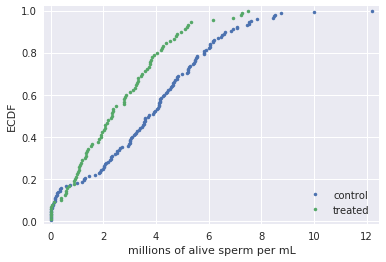

In [79]:
control = np.array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

treated = np.array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696])

#Obtenemos las ecdfs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)
#Nos creamos los plots para nuestros datos
_ = plt.plot(x_control, y_control, marker = '.', linestyle = 'none')
_ = plt.plot(x_treated, y_treated, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('millions of alive sperm per mL')
_ = plt.ylabel('ECDF')
_ = plt.legend(('control', 'treated'), loc = 'lower right')
#Mostramos los resultados por pantalla
plt.show()

Como podemos ver como las abejas que fueron afectadas por el insecticida tienen menos esperma vivo. A continuación vamos a realizar un test de hipótesis. Vamos a tratar de probar la siguiente hipótesis: en promedio, las abejas machos afectadas por el insecticida tienen el mismo número de espermatozoides que las abejas que no se sintieron afectadas por el insecticida

In [80]:
np.random.seed(42)
#Calculamos la diferencia promedia de los datos observados
diff_means = np.mean(control) - np.mean(treated)

#Calculamos el promedio de espermatozoides para ello concatenamos todo en una misma array y calculamos su media
mean_count = np.mean(np.concatenate((control, treated)))

#Nos creamos dos arrays donde tanto para control y treated tendrán la misma media
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

#Generemos nuestras replicas, es decir, calculamos la media de esperma para nuestras dos nuevas arrays
bs_reps_control = draw_bs_reps(control_shifted, np.mean, size = 10000)
bs_reps_treated = draw_bs_reps(treated_shifted, np.mean, size = 10000)

#Calculamos la diferencia promedio para cada una de las replicas
bs_replicates = bs_reps_control - bs_reps_treated

#Obtenemos el p-valor
p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
print('p-value: ', p)

p-value:  0.0


Podemos ver que obtenemos un p-value de valor cero, esto significa que nuestro p-value es lo suficientemente pequeño, es decir, nuestra significancia estadísticas es elevada, por lo que podemos rechazar la hipótesis nula.

# Caso de estudio 

A continuación vamos a proceder a poner en práctica todo lo visto anteriormente con un caso de estudio. Vamos a trabajar con los datos de la especie G.Scandens, que se trata de un ave que tiene como principal habitat las islas Galápagos. Vamos a trabajar con información sobre la longitud y la profundidad de su pico. Trataremos con información del año 1975 y del año 2012 y veremos la evolución.

En primer lugar procedemos a la lectura de los datos.

In [81]:
#Lectura de datos
df_1975 = pd.read_csv('finch_beaks_1975.csv')
df_1975['year'] = [1975] * df_1975.shape[0]
df_2012 = pd.read_csv('finch_beaks_2012.csv')
df_2012['year'] = [2012] * df_2012.shape[0]
#Concatenamos ambos dataframes
df = pd.concat([df_1975, df_2012])
df.head()

,band,species,beak_length,beak_depth,year
0,2,fortis,9.4,8.0,1975
1,9,fortis,9.2,8.3,1975
2,12,fortis,9.5,7.5,1975
3,15,fortis,9.5,8.0,1975
4,305,fortis,11.5,9.9,1975


A continuación vamos a proceder a ver como ha evolucionado la profundidad del pico para el caso de la especie scanden para ellos nos vamos a crear un dataframe con dicha especie, la profundidad del pico y el año. Tras esto vamos a generar un swarm plot.

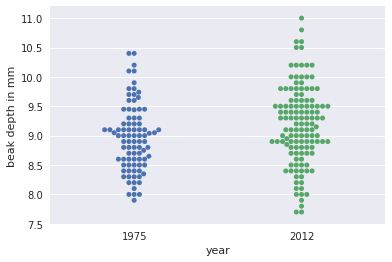

In [82]:
#Nos creamos nuestro conjunto de datos para la especie scandens
df_scandens = df[df['species'] == 'scandens'][['beak_depth', 'year', 'beak_length']]
#Nos creamos el plot
_ = sns.swarmplot(x = 'year', y = 'beak_depth', data = df_scandens)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth in mm')
plt.show()

A simple vista es bastante complicado ver si existe una diferencia clara entre los datos. Con una observación breve parece que los datos del año 2012 pueden tener una media ligeramente más elevada, y también tener una mayor varianza

El siguiente paso que nos dejará de forma más clara como ha evolucionado la profundidad del pico durante estos dos años es la ECDF.

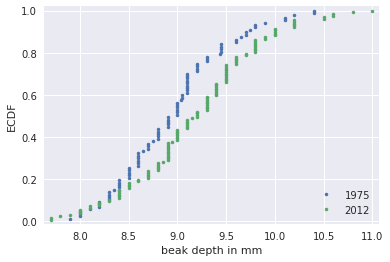

In [83]:
#Nos creamos dos arrays
bd_1975 = np.array(df_scandens[df_scandens['year'] == 1975]['beak_depth'].tolist())
bd_2012 = np.array(df_scandens[df_scandens['year'] == 2012]['beak_depth'].tolist())
#Nos creamos las ecdfs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)
#Configuramos los plots
_ = plt.plot(x_1975, y_1975, marker = '.', linestyle = 'none')
_ = plt.plot(x_2012, y_2012, marker = '.', linestyle = 'none')
plt.margins(0.02)
_ = plt.xlabel('beak depth in mm')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc = 'lower right')
#Mostramos los resultados por pantalla
plt.show()

En la ECDF las diferencias se muestran de forma mucho más clara. Podemos ver como la media es superior para el año 2012 y la varianza también. El siguiente paso consistirá en calcular la diferencia promedio de la profundidad de los picos y tomar un intervalo de confianza del 95%, es decir, el rango en el cual se mueven el 95% de los datos.

In [84]:
#Calculamos la diferencia de medias de los datos observados
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

#Replicamos la operación para cada uno de los años
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

#Ahora calculamos la diferencia de medias
bs_replicates = bs_replicates_2012 - bs_replicates_1975

#Seleccionamos el percentil del 95%
percentile_95 = np.percentile(bs_replicates, np.array([2.5, 97.5]))

#Mostramos los resultados
print('diferencia de medias = ', mean_diff)
print('Intervalo del 95% de confianza: ', percentile_95)

diferencia de medias =  0.226220472441
Intervalo del 95% de confianza:  [ 0.0578587   0.39159207]


Tras realizar esto vamos a realizar un test de hipótesis que nos permita responder a la pregunta: ¿Esta aumentando la profundidad del pico en la especie scandens?. Con la representación gráfica y con los cálculos de la diferencia de medias y del intervalo de confianza todo hace indicar que la respuesta a esta pregunta es sí, pero podría ser que estos datos fuesen cuestión del azar, es decir, ¿cuál es la probabilidad de que obtengamos la diferencia de medias observada si ambos medios fueran iguales?. Es decir, nuestra hipótesis es que las medias son iguales.

In [85]:
np.random.seed(42)
#Calculamos la media de ambos datasets combinados
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))
#Ahora nos creamos nuestra hipótesis, ambos conjuntos de datos tienen la misma media
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean
#Ahora replicamos los datos anteriores
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)
#Ahora calculamos la diferencia de medias
bs_replicates = bs_replicates_2012 - bs_replicates_1975
#Computamos el valor de p_value
p = np.sum(bs_replicates >= mean_diff)/len(bs_replicates)
print('p-value: ', p)

p-value:  0.0034


Esto nos hace indicar que nuestra diferencia de medias es estadísticamente significativa, es decir, nuestros resultados no fueron causa del azar y debemos rechazar la hipótesis nula de que las medias son iguales. Debemos recordar que es muy importante saber como de diferentes son. En el ejercicio anterior obtuvimos una diferencia de medias de 0.2mm en 37 años, esto nos hace indicar que esta diferencia es significativa, ya que en caso de que siga avanzando a este ritmo el profundidad del pico de esta especie se vería multiplicada por dos en tan solo 400 años.

A continuación vamos a realizar un estudio para ver como ha evolucionado la profundidad y la longitud del pico de esta especie conjuntamente.

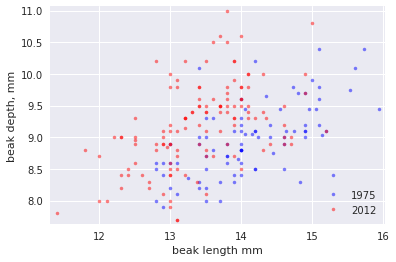

In [86]:
#Obtenemos la longitud del pico de ambos años
bl_1975 = np.array(df_scandens[df_scandens['year'] == 1975]['beak_length'].tolist())
bl_2012 = np.array(df_scandens[df_scandens['year'] == 2012]['beak_length'].tolist())
#Nos creamos el scatter plot
_ = plt.plot(bl_1975, bd_1975, marker = '.', linestyle = 'none', alpha = 0.5, color = 'blue')
_ = plt.plot(bl_2012, bd_2012, marker = '.', linestyle = 'none', alpha = 0.5, color = 'red')
plt.margins(0.02)
_ = plt.xlabel('beak length mm')
_ = plt.ylabel('beak depth, mm')
_ = plt.legend(('1975', '2012'), loc = 'lower right')
#Mostramos los resultados por pantalla
plt.show()

Si observamos este gráfico, podemos ver como en el año 2012 los picos tendieron a hacerse un poco más profundos, ya que se puede observar como los puntos rojos están más elevados que los puntos azules generalmente. Sin embargo, podemos ver como de forma general los puntos rojos están a la derecha  de los puntos azules, es decir, tendieron a hacerse más cortos. Finalmente podemos decir que los picos tendieron de forma general a hacerse más profundos y más cortos.

A continuación vamos a proceder a realizar una regresión lineal para cada uno de los años. Es decir, vamos a proceder a estimar los parámetros de regresión, y reportaremos el intervalo de confianza del 95% de los datos para el parámetro de intersección y pendiente de la regresión.

In [87]:
#Calculamos la regresión lineal
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)
#Realizamos un bootstrap para la regresión
bs_slope_1975, bs_intercept_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_2012, bs_intercept_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)
#Tras esto procedemos a obtener para cada parámetro el intervalo de confianza del 95%
slope_conf_int_1975 = np.percentile(bs_slope_1975, np.array([2.5, 97.5]))
slope_conf_int_2012 = np.percentile(bs_slope_2012, np.array([2.5, 97.5]))
intercept_conf_int_1975 = np.percentile(bs_intercept_1975, np.array([2.5, 97.5]))
intercept_conf_int_2012 = np.percentile(bs_intercept_2012, np.array([2.5, 97.5]))
#Mostramos los resultados por pantalla
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.33204478  0.59449384]
1975: intercept = 2.39087523658 conf int = [ 0.58355792  4.31190024]
2012: slope = 0.462630358835 conf int = [ 0.33186804  0.60236634]
2012: intercept = 2.97724749824 conf int = [ 1.09485964  4.76711109]


Podemos ver como la pendiente es prácticamente igual, lo que nos quiere decir que el ratio entre el crecimiento de la longitud del pico y el ratio de crecimiento de profundidad del pico son iguales. Sin embargo podemos observar como la intersección si es diferente.

Ahora vamos proceder a representar gráficamente cada una de las regresiones lineales calculadas

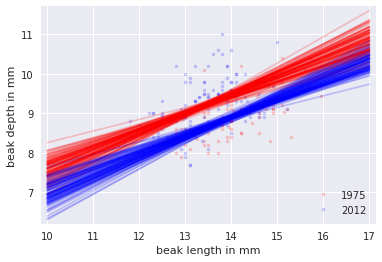

In [90]:
#Realizamos la representación gráfica de los datos en modo scatter plot
_ = plt.plot(bl_1975, bd_1975, marker = '.', linestyle = 'none', alpha = 0.2, color = 'red')
_ = plt.plot(bl_2012, bd_2012, marker = '.', linestyle = 'none', alpha = 0.2, color = 'blue')
_ = plt.xlabel('beak length in mm')
_ = plt.ylabel('beak depth in mm')
plt.margins(0.02)
_ = plt.legend(('1975', '2012'), loc = 'lower right')
#Calculamos un valor para el eje x
x = np.array([10, 17])
#Representamos cada una de las líneas de regresión, en este caso vamos a representar las 100 primeras
for i in range(100):
    plt.plot(x, bs_slope_1975[i] * x + bs_intercept_1975[i], alpha = 0.2, color = 'blue')
    plt.plot(x, bs_slope_2012[i] * x + bs_intercept_2012[i], alpha = 0.2, color = 'red')
    
#Mostramos los resultados por pantalla
plt.show()

Esta regresión lineal muestra información interesante sobre la geometría del pico. Que ambas tenga igual pendiente nos indica que por cada milímetro que aumentó la longitud, se aumentó medio milímetro de profundidad. Sin embargo, nuestro interés radica en el tamaño del pico, es decir, queremos comparar el ratio entre la longitud del pico y su profundidad.

In [91]:
#Calculamos los ratios para ambos años
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

#Computamos la media 
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

#Generamos las replicas
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

#Computamos el intervalo de confianza 99%
conf_int_1975 = np.percentile(bs_replicates_1975, np.array([0.5, 99.5]))
conf_int_2012 = np.percentile(bs_replicates_2012, np.array([0.5, 99.5]))

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.57888237719 conf int = [ 1.55684007  1.60131071]
2012: mean ratio = 1.46583422768 conf int = [ 1.44411705  1.48750423]


Podemos ver como la relación entre la longitud media y la profundidad media del pico disminuyó aproximadamente un 0.1 o un 7%. Además los intervalos del 99% de confianza no está ni cerca de superponerse, por lo que esto es un cambio real, la forma del pico cambió.Cuando los intervalos de confianza ni siquiera están cerca de la superposición, el efecto de variación es mayor. Podríamos calcular el valor de p, pero realmente no es necesario.

La array bd_parent_scandens contiene la profundidad media del pico de dos padres de la especie Scandens. El array bd_offspring_scandens contiene la profundidad media del pico de dos descendientes de los padres que se encuentran en la matriz anterior. Las arrays bd_parents_fortis y bd_offspring_fortis contienen la misma información pero para la especie fortis.

In [92]:
bd_parent_scandens = np.array([  8.3318,   8.4035,   8.5317,   8.7202,   8.7089,   8.7541,
         8.773 ,   8.8107,   8.7919,   8.8069,   8.6523,   8.6146,
         8.6938,   8.7127,   8.7466,   8.7504,   8.7805,   8.7428,
         8.7164,   8.8032,   8.8258,   8.856 ,   8.9012,   8.9125,
         8.8635,   8.8258,   8.8522,   8.8974,   8.9427,   8.9879,
         8.9615,   8.9238,   8.9351,   9.0143,   9.0558,   9.0596,
         8.9917,   8.905 ,   8.9314,   8.9465,   8.9879,   8.9804,
         9.0219,   9.052 ,   9.0407,   9.0407,   8.9955,   8.9992,
         8.9992,   9.0747,   9.0747,   9.5385,   9.4781,   9.4517,
         9.3537,   9.2707,   9.1199,   9.1689,   9.1425,   9.135 ,
         9.1011,   9.1727,   9.2217,   9.2255,   9.2821,   9.3235,
         9.3198,   9.3198,   9.3198,   9.3273,   9.3725,   9.3989,
         9.4253,   9.4593,   9.4442,   9.4291,   9.2632,   9.2293,
         9.1878,   9.1425,   9.1275,   9.1802,   9.1765,   9.2481,
         9.2481,   9.1991,   9.1689,   9.1765,   9.2406,   9.3198,
         9.3235,   9.1991,   9.2971,   9.2443,   9.316 ,   9.2934,
         9.3914,   9.3989,   9.5121,   9.6176,   9.5535,   9.4668,
         9.3725,   9.3348,   9.3763,   9.3839,   9.4216,   9.4065,
         9.3348,   9.4442,   9.4367,   9.5083,   9.448 ,   9.4781,
         9.595 ,   9.6101,   9.5686,   9.6365,   9.7119,   9.8213,
         9.825 ,   9.7609,   9.6516,   9.5988,   9.546 ,   9.6516,
         9.7572,   9.8854,  10.0023,   9.3914])

bd_offspring_scandens = np.array([  8.419 ,   9.2468,   8.1532,   8.0089,   8.2215,   8.3734,
         8.5025,   8.6392,   8.7684,   8.8139,   8.7911,   8.9051,
         8.9203,   8.8747,   8.943 ,   9.0038,   8.981 ,   9.0949,
         9.2696,   9.1633,   9.1785,   9.1937,   9.2772,   9.0722,
         8.9658,   8.9658,   8.5025,   8.4949,   8.4949,   8.5633,
         8.6013,   8.6468,   8.1532,   8.3734,   8.662 ,   8.6924,
         8.7456,   8.8367,   8.8595,   8.9658,   8.9582,   8.8671,
         8.8671,   8.943 ,   9.0646,   9.1405,   9.2089,   9.2848,
         9.3759,   9.4899,   9.4519,   8.1228,   8.2595,   8.3127,
         8.4949,   8.6013,   8.4646,   8.5329,   8.7532,   8.8823,
         9.0342,   8.6392,   8.6772,   8.6316,   8.7532,   8.8291,
         8.8975,   8.9734,   9.0494,   9.1253,   9.1253,   9.1253,
         9.1785,   9.2848,   9.4595,   9.3608,   9.2089,   9.2544,
         9.3684,   9.3684,   9.2316,   9.1709,   9.2316,   9.0342,
         8.8899,   8.8291,   8.981 ,   8.8975,  10.4089,  10.1886,
         9.7633,   9.7329,   9.6114,   9.5051,   9.5127,   9.3684,
         9.6266,   9.5354,  10.0215,  10.0215,   9.6266,   9.6038,
         9.4063,   9.2316,   9.338 ,   9.262 ,   9.262 ,   9.4063,
         9.4367,   9.0342,   8.943 ,   8.9203,   8.7835,   8.7835,
         9.057 ,   8.9354,   8.8975,   8.8139,   8.8671,   9.0873,
         9.2848,   9.2392,   9.2924,   9.4063,   9.3152,   9.4899,
         9.5962,   9.6873,   9.5203,   9.6646])

bd_parent_fortis = np.array([ 10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ])

bd_offspring_fortis = np.array([ 10.7 ,   9.78,   9.48,   9.6 ,  10.27,   9.5 ,   9.  ,   7.46,
         7.65,   8.63,   9.81,   9.4 ,   9.48,   8.75,   7.6 ,  10.  ,
        10.09,   9.74,   9.64,   8.49,  10.15,  10.28,   9.2 ,  10.01,
         9.03,   9.94,  10.5 ,   9.7 ,  10.02,  10.04,   9.43,   8.1 ,
         9.5 ,   9.9 ,   9.48,  10.18,  10.16,   9.08,  10.39,   9.9 ,
         8.4 ,  10.6 ,   8.75,   9.46,   9.6 ,   9.6 ,   9.95,  10.05,
        10.16,  10.1 ,   9.83,   9.46,   9.7 ,   9.82,  10.34,   8.02,
         9.65,   9.87,   9.  ,  11.14,   9.25,   8.14,  10.23,   8.7 ,
         9.8 ,  10.54,  11.19,   9.85,   8.1 ,   9.3 ,   9.34,   9.19,
         9.52,   9.36,   8.8 ,   8.6 ,   8.  ,   8.5 ,   8.3 ,  10.38,
         8.54,   8.94,  10.  ,   9.76,   9.45,   9.89,  10.9 ,   9.91,
         9.39,   9.86,   9.74,   9.9 ,   9.09,   9.69,  10.24,   8.9 ,
         9.67,   8.93,   9.3 ,   8.67,   9.15,   9.23,   9.59,   9.03,
         9.58,   8.97,   8.57,   8.47,   8.71,   9.21,   9.13,   8.5 ,
         9.58,   9.21,   9.6 ,   9.32,   8.7 ,  10.46,   9.29,   9.24,
         9.45,   9.35,  10.19,   9.91,   9.18,   9.89,   9.6 ,  10.3 ,
         9.45,   8.79,   9.2 ,   8.8 ,   9.69,  10.61,   9.6 ,   9.9 ,
         9.26,  10.2 ,   8.79,   9.28,   8.83,   9.76,  10.2 ,   9.43,
         9.4 ,   9.9 ,   9.5 ,   8.95,   9.98,   9.72,   9.86,  11.1 ,
         9.14,  10.49,   9.75,  10.35,   9.73,   9.83,   8.69,   9.58,
         8.42,   9.25,  10.12,   9.31,   9.99,   8.59,   8.74,   8.79,
         9.6 ,   9.52,   8.93,  10.23,   9.35,   9.35,   9.09,   9.04,
         9.75,  10.5 ,   9.09,   9.05,   9.54,   9.3 ,   9.06,   8.7 ,
         9.32,   8.4 ,   8.67,   8.6 ,   9.53,   9.77,   9.65,   9.43,
         8.35,   8.26,   9.5 ,   8.6 ,   9.57,   9.14,  10.79,   8.91,
         9.93,  10.7 ,   9.3 ,   9.93,   9.51,   9.44,  10.05,  10.13,
         9.24,   8.21,   8.9 ,   9.34,   8.77,   9.4 ,   8.82,   8.83,
         8.6 ,   9.5 ,  10.2 ,   8.09,   9.07,   9.29,   9.1 ,  10.19,
         9.25,   8.98,   9.02,   8.6 ,   8.25,   8.7 ,   9.9 ,   9.65,
         9.45,   9.38,  10.4 ,   9.96,   9.46,   8.26,  10.05,   8.92,
         9.5 ,   9.43,   8.97,   8.44,   8.92,  10.3 ,   8.4 ,   9.37,
         9.91,  10.  ,   9.21,   9.95,   8.84,   9.82,   9.5 ,  10.29,
         8.4 ,   8.31,   9.29,   8.86,   9.4 ,   9.62,   8.62,   8.3 ,
         9.8 ,   8.48,   9.61,   9.5 ,   9.37,   8.74,   9.31,   9.5 ,
         9.49,   9.74,   9.2 ,   9.24,   9.7 ,   9.64,   9.2 ,   7.5 ,
         7.5 ,   8.7 ,   8.31,   9.  ,   9.74,   9.31,  10.5 ,   9.3 ,
         8.12,   9.34,   9.72,   9.  ,   9.65,   9.9 ,  10.  ,  10.1 ,
         8.  ,   9.07,   9.75,   9.33,   8.11,   9.36,   9.74,   9.9 ,
         9.23,   9.7 ,   8.2 ,   9.35,   9.49,   9.34,   8.87,   9.03,
         9.07,   9.43,   8.2 ,   9.19,   9.  ,   9.2 ,   9.06,   9.81,
         8.89,   9.4 ,  10.45,   9.64,   9.03,   8.71,   9.91,   8.33,
         8.2 ,   7.83,   7.14,   8.91,   9.18,   8.8 ,   9.9 ,   7.73,
         9.25,   8.7 ,   9.5 ,   9.3 ,   9.05,  10.18,   8.85,   9.24,
         9.15,   9.98,   8.77,   9.8 ,   8.65,  10.  ,   8.81,   8.01,
         7.9 ,   9.41,  10.18,   9.55,   9.08,   8.4 ,   9.75,   8.9 ,
         9.07,   9.35,   8.9 ,   8.19,   8.65,   9.19,   8.9 ,   9.28,
        10.58,   9.  ,   9.4 ,   8.91,   9.93,  10.  ,   9.37,   7.4 ,
         9.  ,   8.8 ,   9.18,   8.3 ,  10.08,   7.9 ,   9.96,  10.4 ,
         9.65,   8.8 ,   8.65,   9.7 ,   9.23,   9.43,   9.93,   8.47,
         9.55,   9.28,   8.85,   8.9 ,   8.75,   8.63,   9.  ,   9.43,
         8.28,   9.23,  10.4 ,   9.  ,   9.8 ,   9.77,   8.97,   8.37,
         7.7 ,   7.9 ,   9.5 ,   8.2 ,   8.8 ])



A continuación vamos a proceder a visualizar los datos para hacernos una idea de como están distribuidos y que información nos aportan.

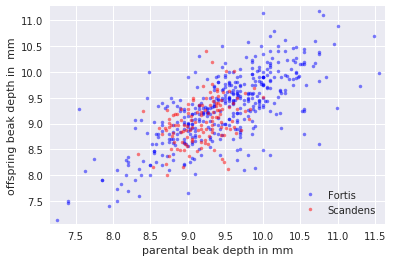

In [93]:
#Nos creamos los plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis, marker = '.', linestyle = 'none', color = 'blue', alpha = 0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens, marker = '.', linestyle = 'none', color = 'red', alpha = 0.5)
plt.margins(0.02)
_ = plt.xlabel('parental beak depth in mm')
_ = plt.ylabel('offspring beak depth in  mm')
_ = plt.legend(('Fortis', 'Scandens'), loc = 'lower right')
#Mostramos el plot
plt.show()

Parece ser que la correlación es más fuerta para el caso de la especie G.Fortis que en la especia G.Scandens. Esto hace indicar que la herencia de la profundidad del pico es más fuerte en el caso de G.Fortis.

Para ver la correlación existente entre la herencia de ambas especies, podemos hacer uso del coeficiente de Pearson. Anteriormente ya creamos una función que nos permitia estimar los parámetro de una regresión lineal a partir de dos valores. A continuación vamos a proceder a crear una función que a partir de dos pares nos crea un parámetro estadístico.

In [97]:
def draw_bs_pairs(x, y, func, size = 1):
    #Nos creamos un array de índices
    inds = range(len(x))
    #Inicializamos el vector de replicas
    bs_replicates = np.empty(size)
    #Generamos las replicas
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)
    return bs_replicates

El coeficiente de correlación de Pearson puede ser una medida útil que nos indica la fuerza con la que los descendientes de una especie heredan la profunidad del pico. A continuación vamos a calcular dicho coeficiente y tomaremos un intervalo de confianza del 95%.

In [98]:
#Calculamos el coeficiente de Pearson para los datos observados
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

#Hacemos 1000 replicas para el coeficiente de Pearson
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)

#Tomamos un intervalo de confianza del 95%
conf_int_scandens = np.percentile(bs_replicates_scandens, np.array([2.5, 97.5]))
conf_int_fortis = np.percentile(bs_replicates_fortis, np.array([2.5, 97.5]))

#Mostramos los resultados por pantalla
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.41170636294 [ 0.27287511  0.54092141]
G. fortis: 0.728341239552 [ 0.66804693  0.78088891]


Podemos ver de forma clara que el coeficiente de Pearson es superior para la especie Fortis. Aunque podemos ver que la variabilidad es mayor en el caso de la especie Scandens.

Si recordamos el coeficiente de Pearson se calcula como la relación entre la covarianza y la media geométrica de la varianza de ambos conjuntos de datos. Esta medida nos da una relacción entre padres e hijos, pero podría no ser la mejor opción a la hora de calcular la fuerza de herencia. Si nos detenemos a pensar, tiene más sentido definir la fueza de herencia como la relación entre la covarianza de padres e hijos con la varianza de los padres solos. En el siguiente ejercicio vamos a calcular la heredabilidad de esta forma y tomaremos un rango de confianza del 95%.

In [101]:
def heritability(parents, offspring):
    '''Calcula el coeficiente de heredabilidad'''
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

#Calculamos los coeficientes de heredabilidad para los datos observados
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

#Ahora hacemos las replicas de 1000 elementos
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, heritability, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, heritability, 1000)

#Nos quedamos con un intervalo del 95% de confianza
conf_int_scandens = np.percentile(bs_replicates_scandens, np.array([2.5, 97.5]))
conf_int_fortis = np.percentile(bs_replicates_fortis, np.array([2.5, 97.5]))

#Mostramos los resultados por pantalla
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.548534086869 [ 0.3495785   0.75068325]
G. fortis: 0.722905191144 [ 0.64896056  0.79679239]


Nuevamente podemos ver como la heredabilidad de la especie Fortis es bastante más fuerte que la heredabilidad de la especie Scandens.

Parece ser que la heredabilidad en la profundidad del pico es menor para la especie Scandens. Es posible que la observación de la heredebalidad esta se haya visto por casualidady realmente la profundidad del pico no sea heredable para la especie Scandens. Para ello vamos a realizar un test de hipótesis, partiendo que esta hipótesis, es verdadera.

In [108]:
#Inicializamos la array donde vamos a guardar los resultados
perm_replicates = np.empty(10000)
#Calculamos la heradebalidad para 10000 muestras
for i in range(10000):
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)

#Calculamos el p-valor
p_value = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)
print('p-value: ', p_value)

p-value:  0.0


Podemos ver como obtenemos un p-valor nulo, esto nos hace indicar que nuestro p-valor es muy pequeño y por lo tanto es lo suficientemente significativo desde un puto de vista estadístico. Por lo tanto, esto nos indica que la profundidad del pico en la especie Scandens es heredado pero con menos fuerza que en la especie Fortis.